# Bad Lightcurves

In [1]:
import os
os.chdir('../../scripts')
import pandas as pd
import matplotlib.pyplot as plt
from post_processing import get_output
from analysis_tools_cython import *
import seaborn as sns
plt.rcParams['figure.figsize'] = [12,7]

## Making dataframes

In [2]:
for i in range(1,27):
    filename = 's%d.txt' % i
    variable_name = 'sector_%d' % i
    file_path = os.path.join('..', 'output_log', filename)

    # Use the custom function to read the file and assign it to a dynamically named variable
    exec("%s = get_output('%s')" % (variable_name, file_path))

## MAD Method

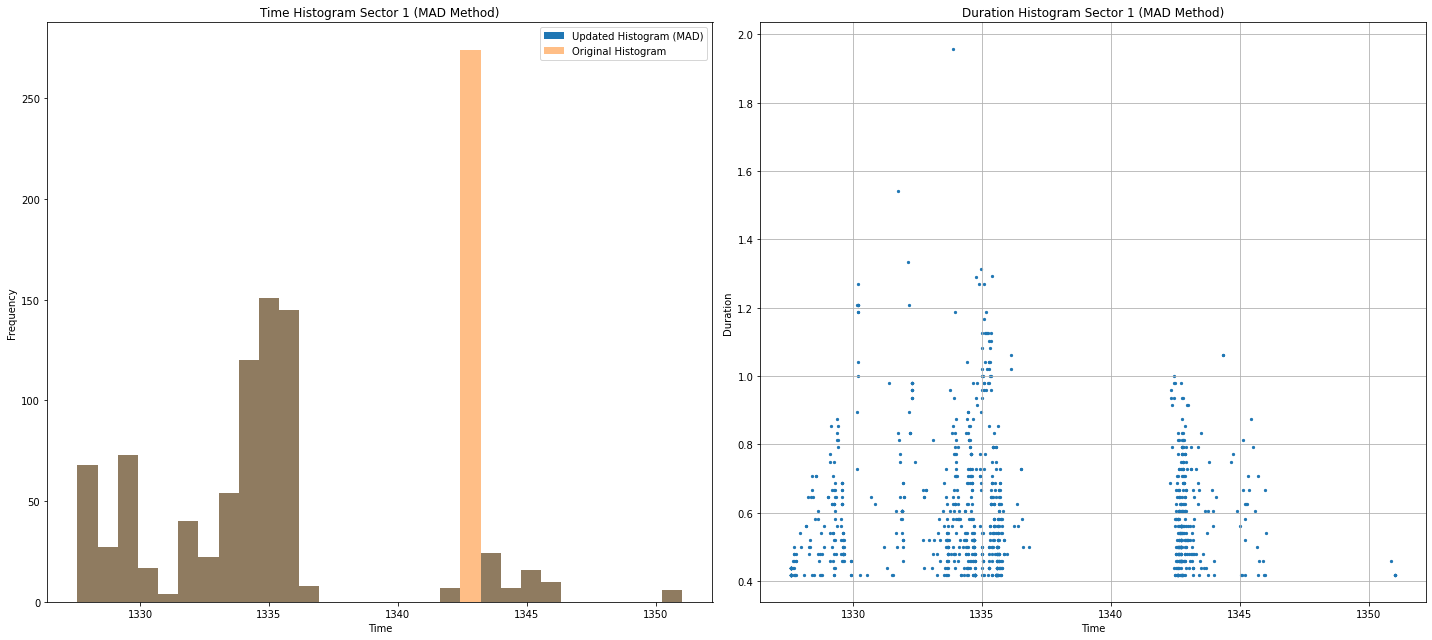

total candidates of Sector 1: 1073
total bad lcs: 274
Bins of bad lightcurves:
    Bin Range: 1342.4342606666667 - 1343.2163833333334


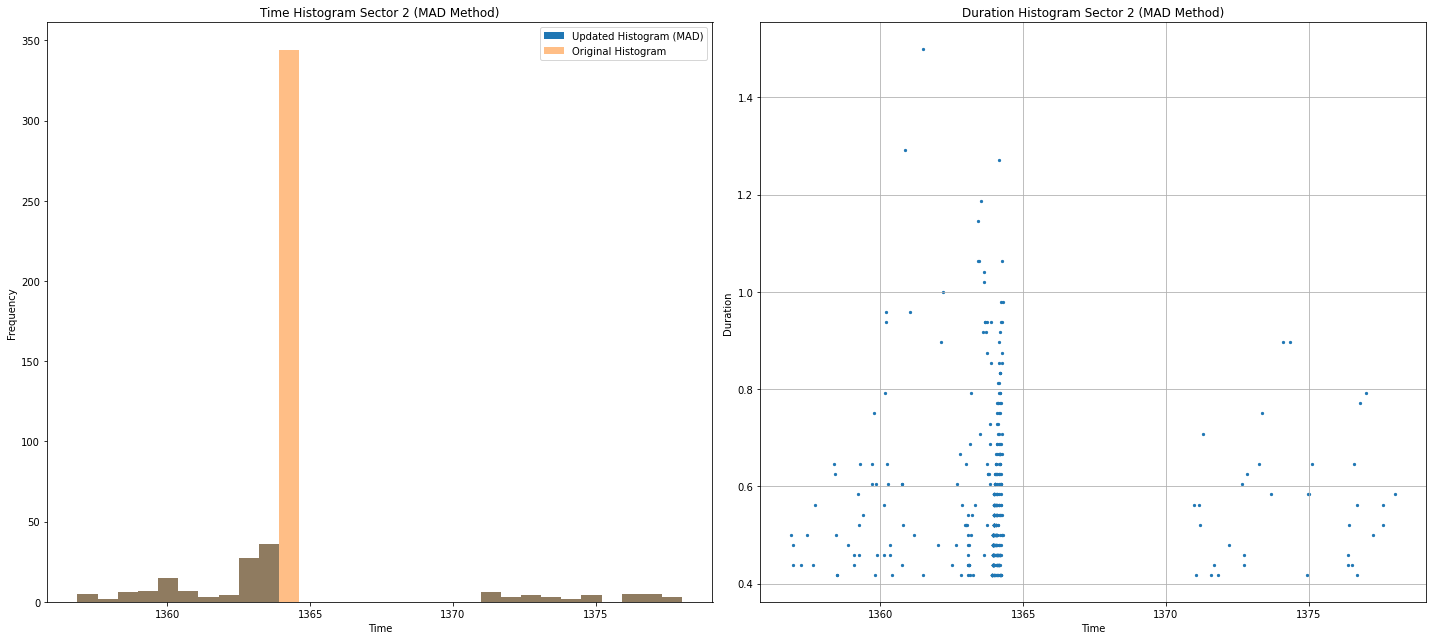

total candidates of Sector 2: 491
total bad lcs: 344
Bins of bad lightcurves:
    Bin Range: 1363.9117833333335 - 1364.6180656666668


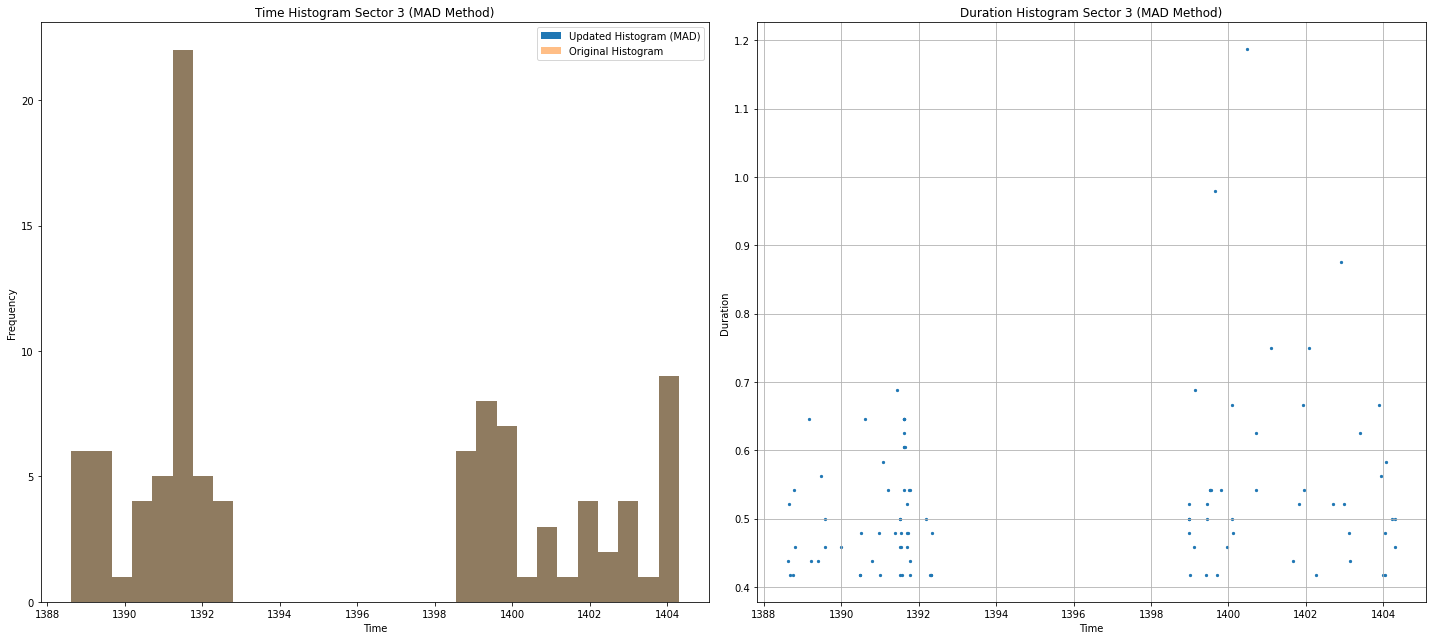

total candidates of Sector 3: 99
total bad lcs: 0
Bins of bad lightcurves:


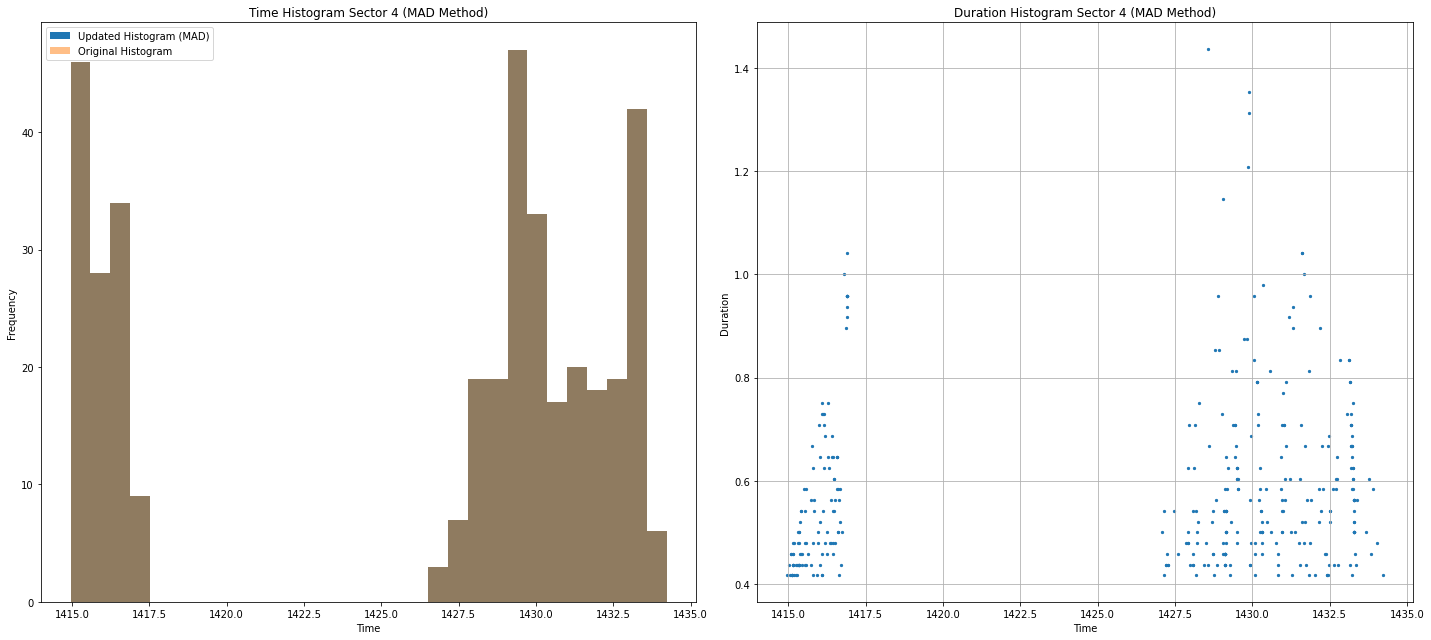

total candidates of Sector 4: 367
total bad lcs: 0
Bins of bad lightcurves:


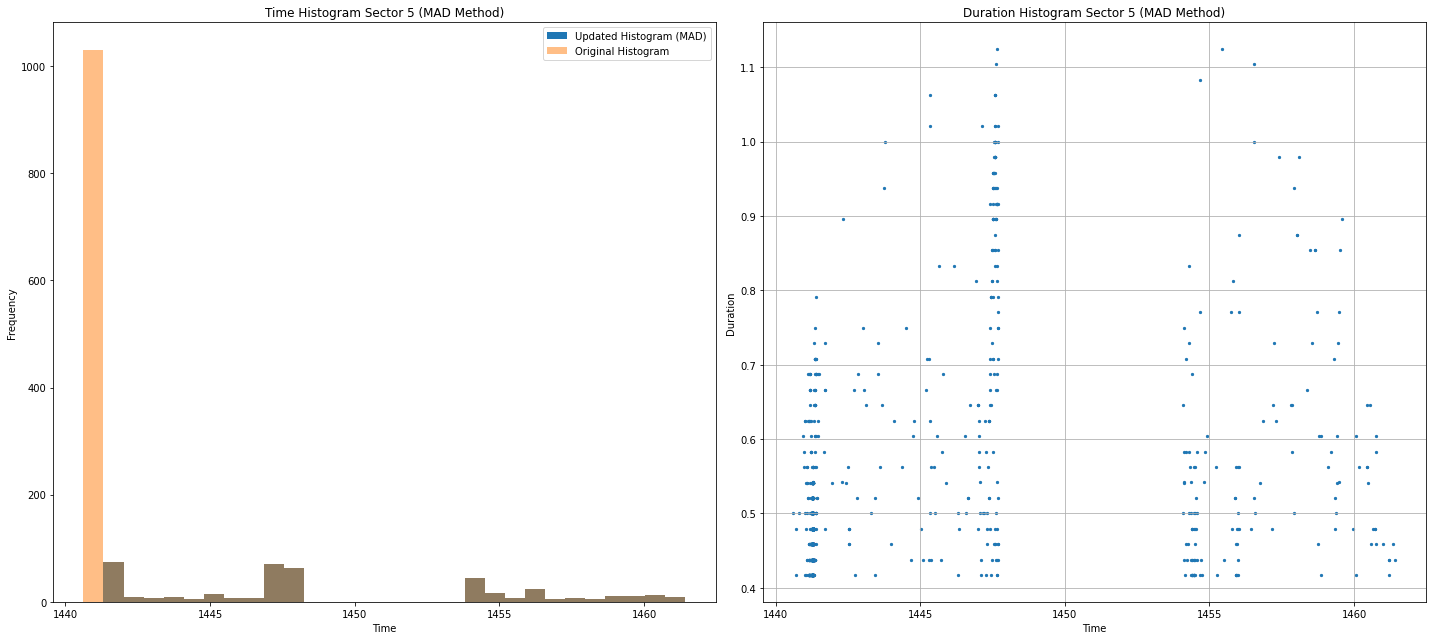

total candidates of Sector 5: 1453
total bad lcs: 1030
Bins of bad lightcurves:
    Bin Range: 1440.62082 - 1441.3144363333333


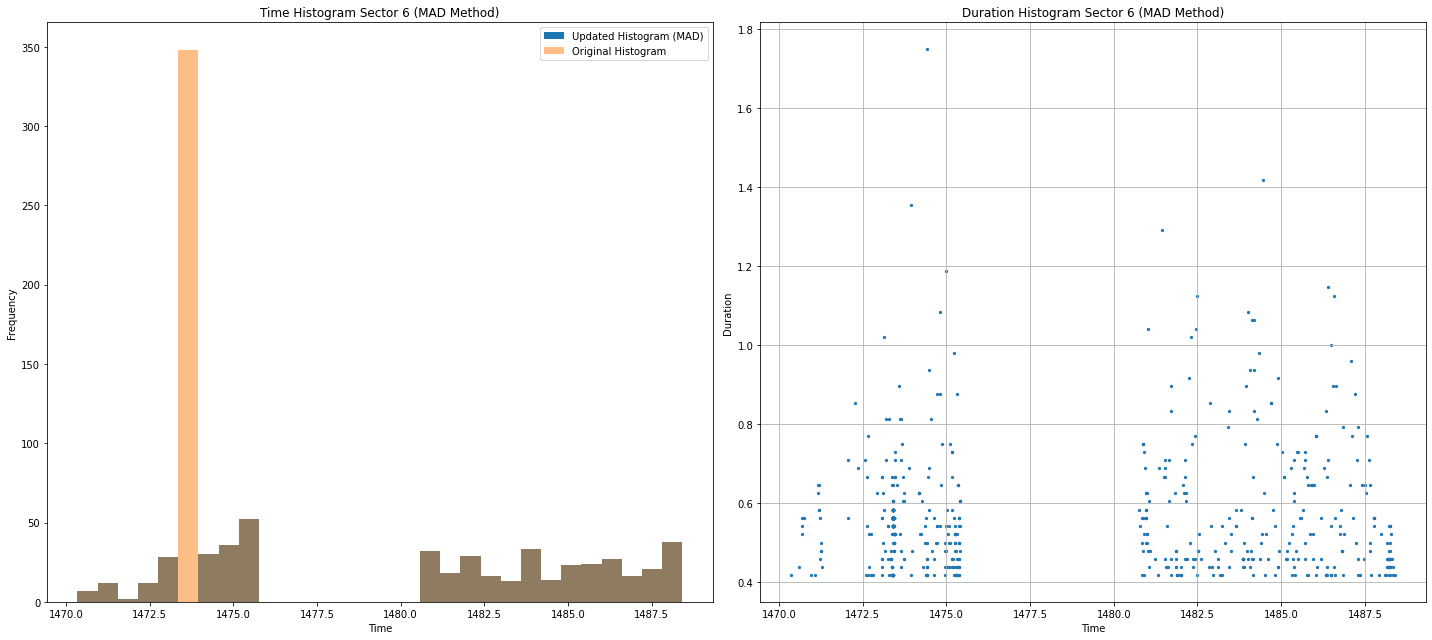

total candidates of Sector 6: 831
total bad lcs: 348
Bins of bad lightcurves:
    Bin Range: 1473.3569349999998 - 1473.9590959999998


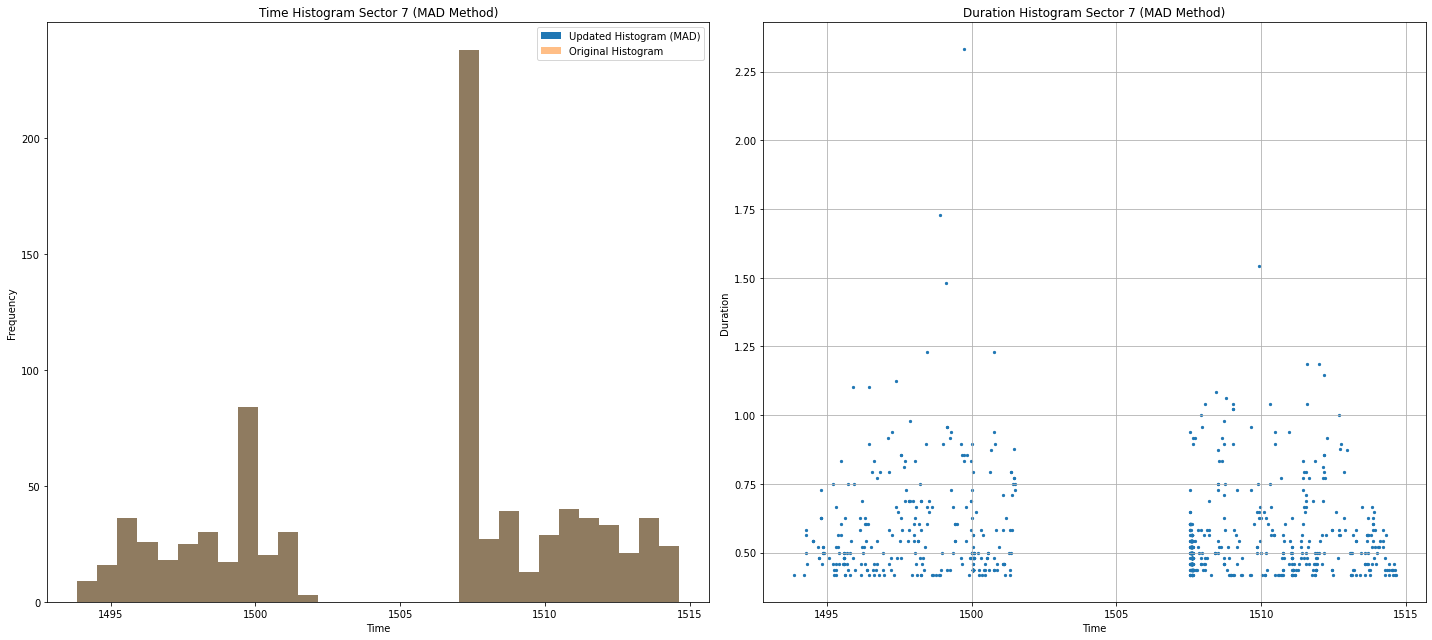

total candidates of Sector 7: 850
total bad lcs: 0
Bins of bad lightcurves:


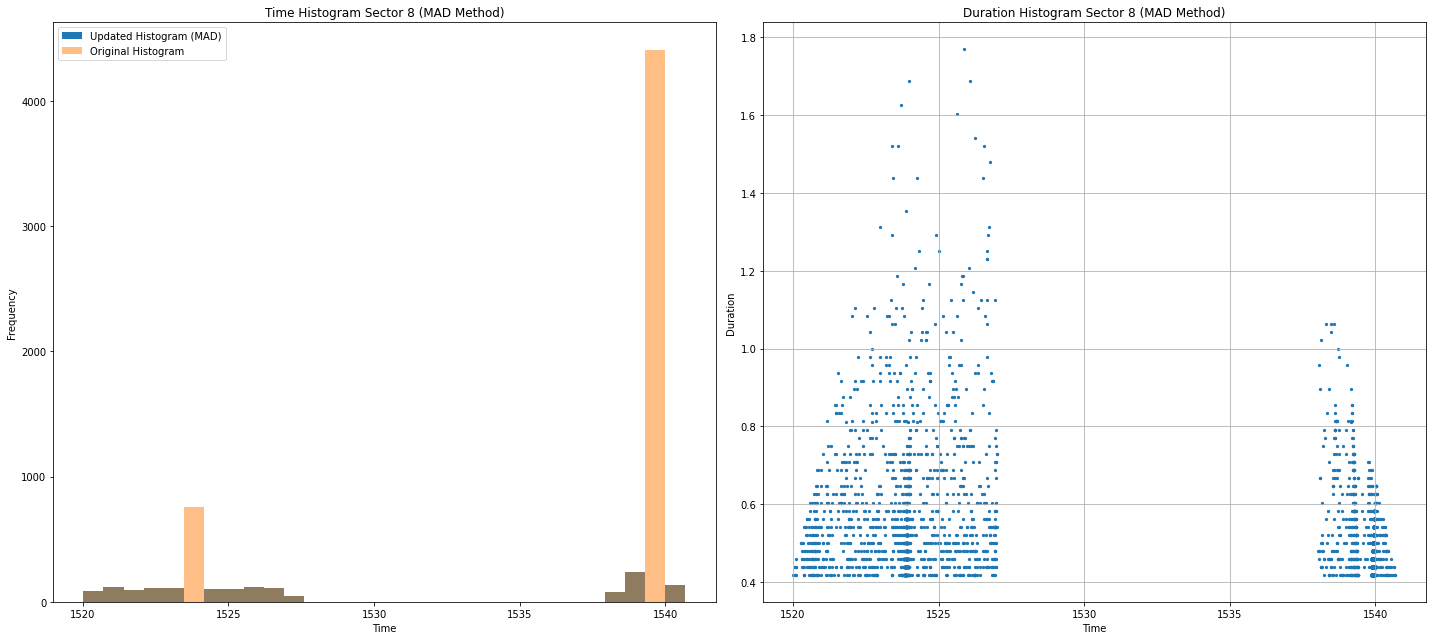

total candidates of Sector 8: 6610
total bad lcs: 5160
Bins of bad lightcurves:
    Bin Range: 1523.4638816666666 - 1524.1533439999998
    Bin Range: 1539.3215153333333 - 1540.0109776666666


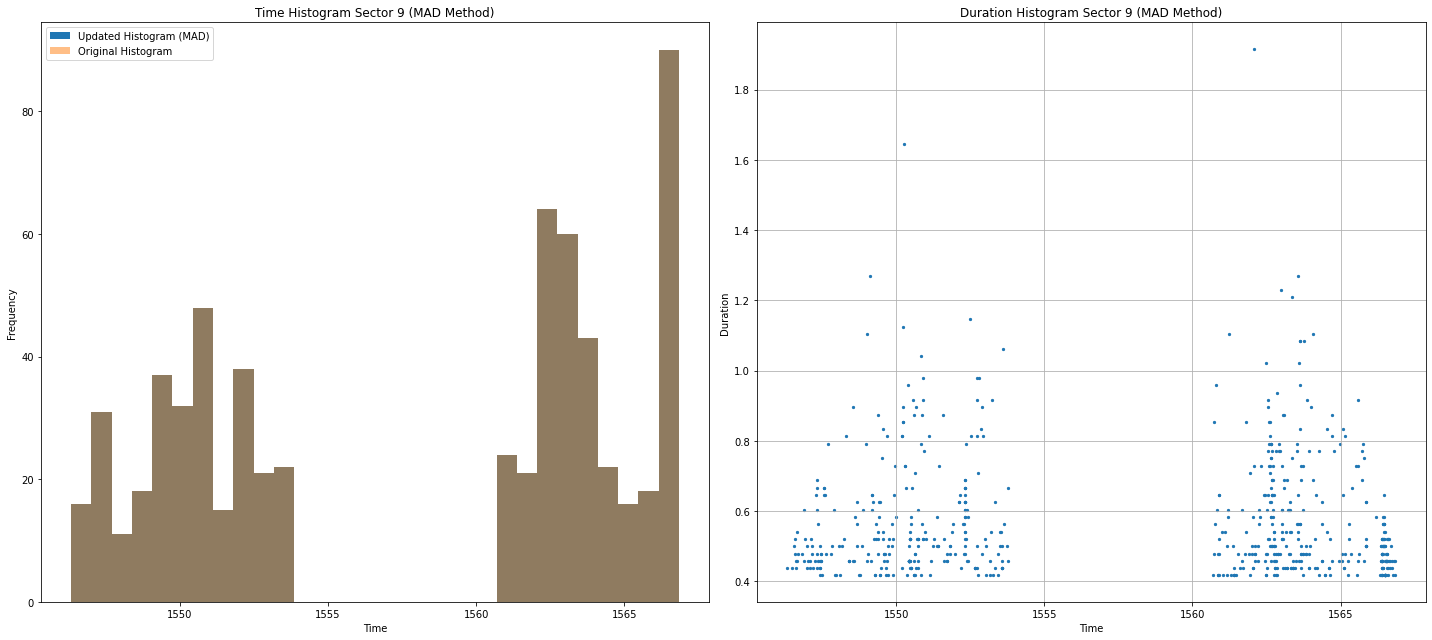

total candidates of Sector 9: 647
total bad lcs: 0
Bins of bad lightcurves:


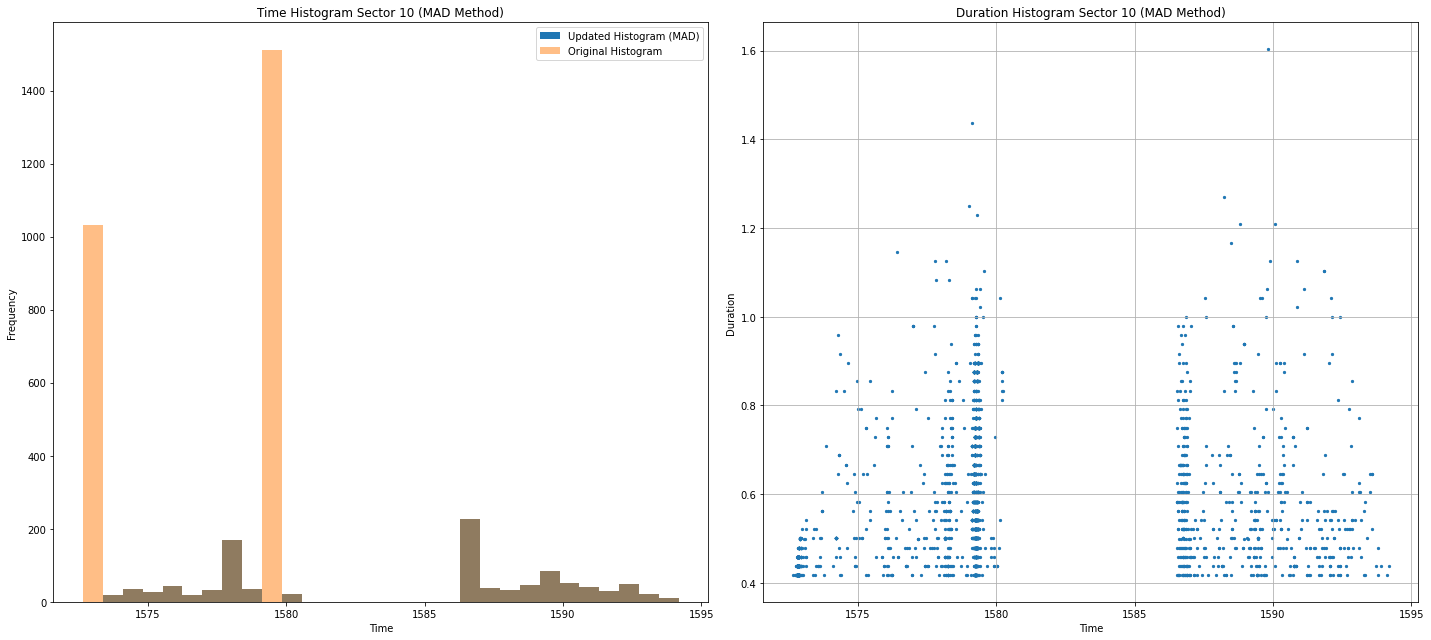

total candidates of Sector 10: 3572
total bad lcs: 2543
Bins of bad lightcurves:
    Bin Range: 1572.66209 - 1573.3793406666666
    Bin Range: 1579.117346 - 1579.8345966666666


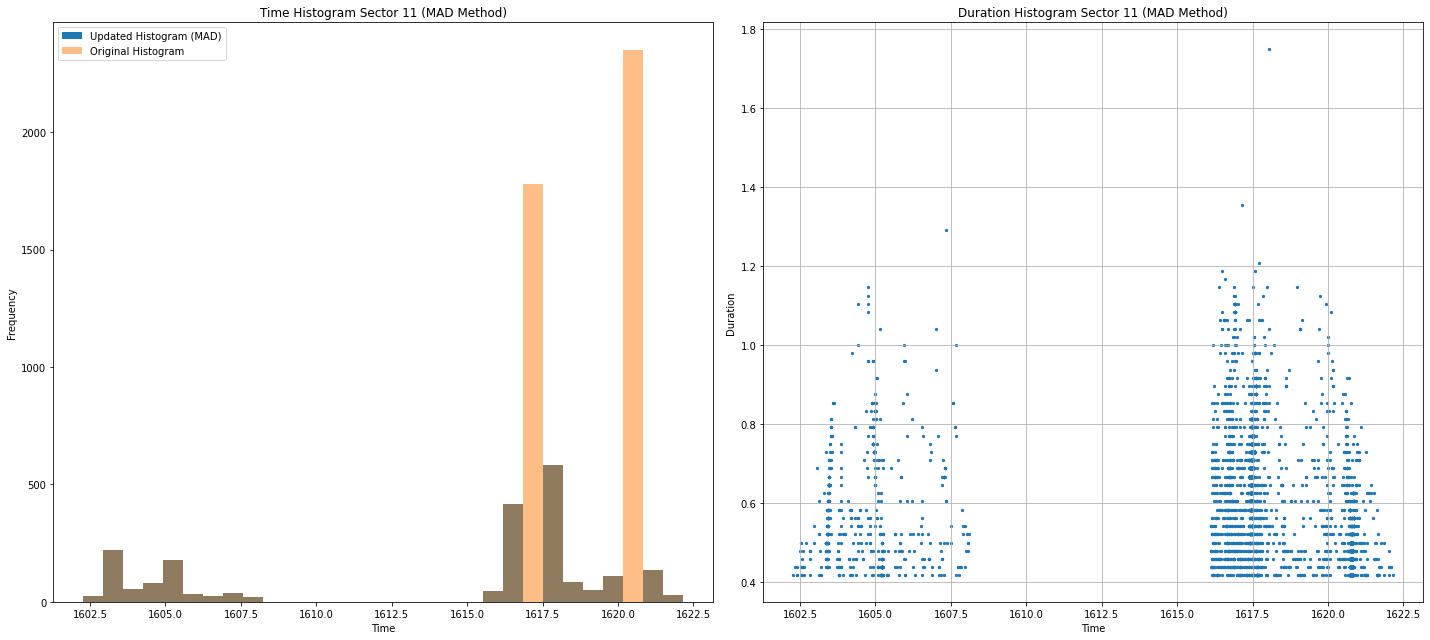

total candidates of Sector 11: 6258
total bad lcs: 4130
Bins of bad lightcurves:
    Bin Range: 1616.860318 - 1617.523037
    Bin Range: 1620.173913 - 1620.836632


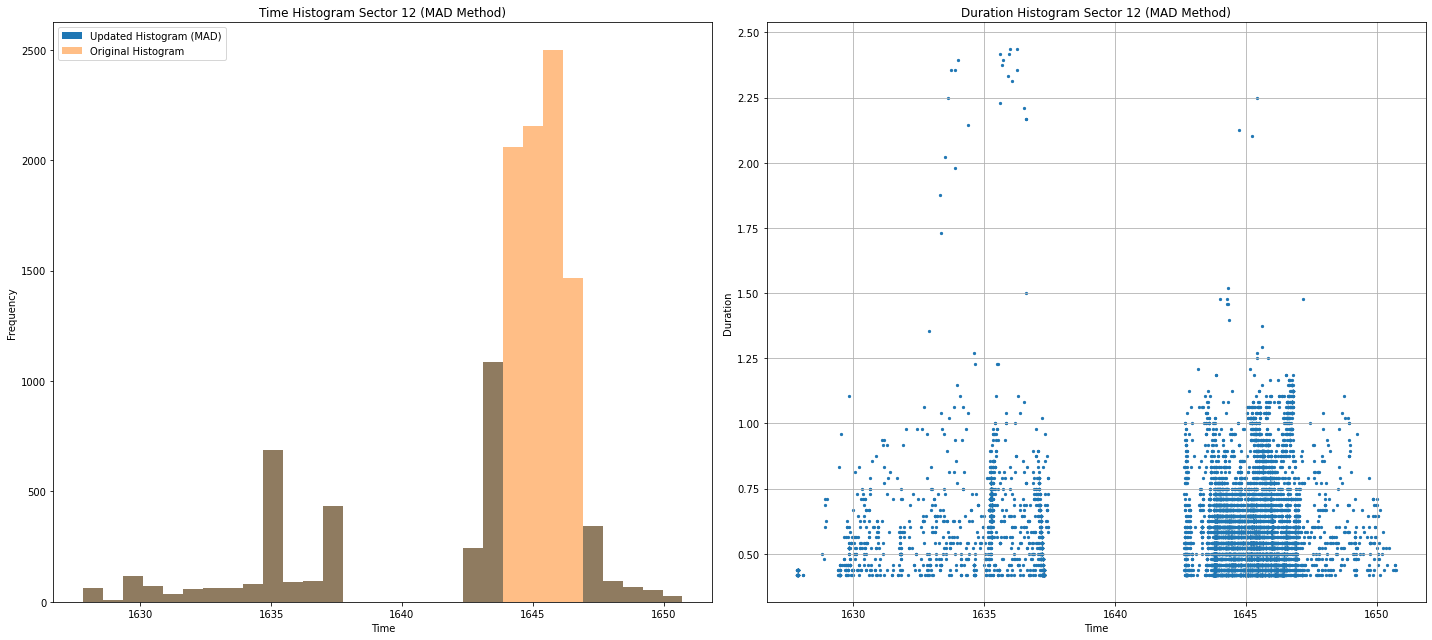

total candidates of Sector 12: 11957
total bad lcs: 8182
Bins of bad lightcurves:
    Bin Range: 1643.854757 - 1644.6180906666668
    Bin Range: 1644.6180906666666 - 1645.3814243333334
    Bin Range: 1645.3814243333334 - 1646.1447580000001
    Bin Range: 1646.1447580000001 - 1646.908091666667


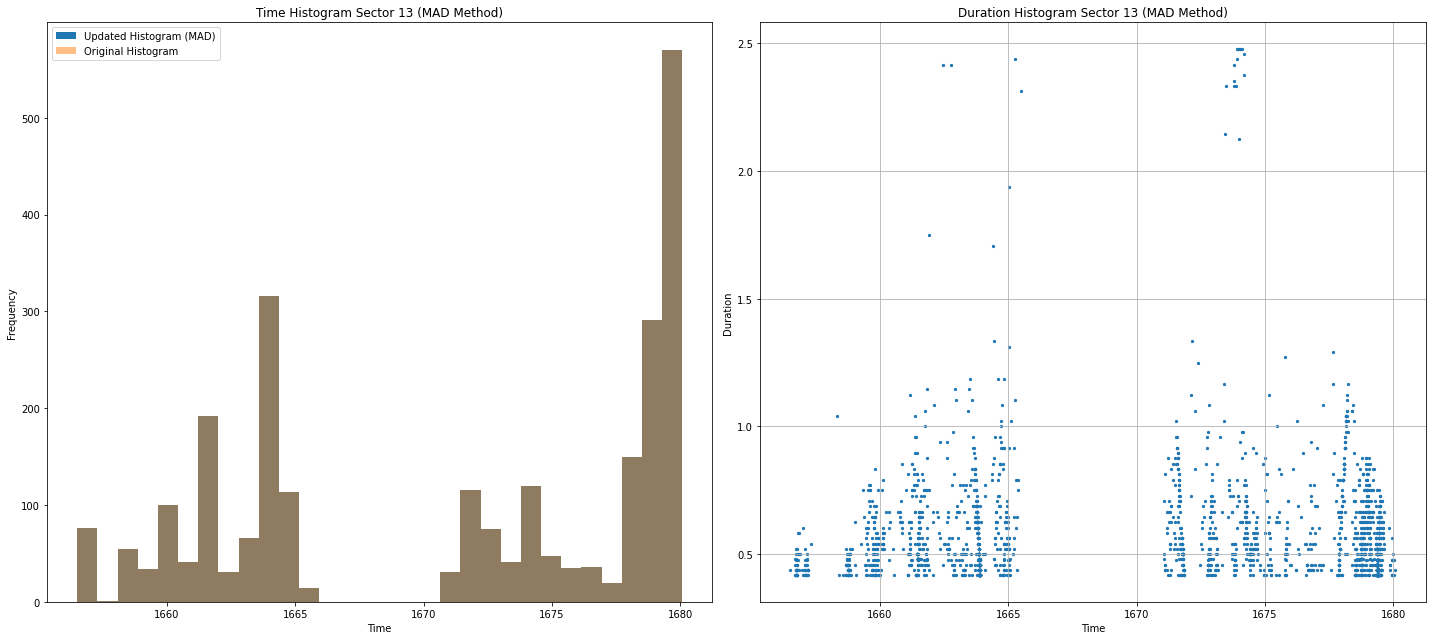

total candidates of Sector 13: 2570
total bad lcs: 0
Bins of bad lightcurves:


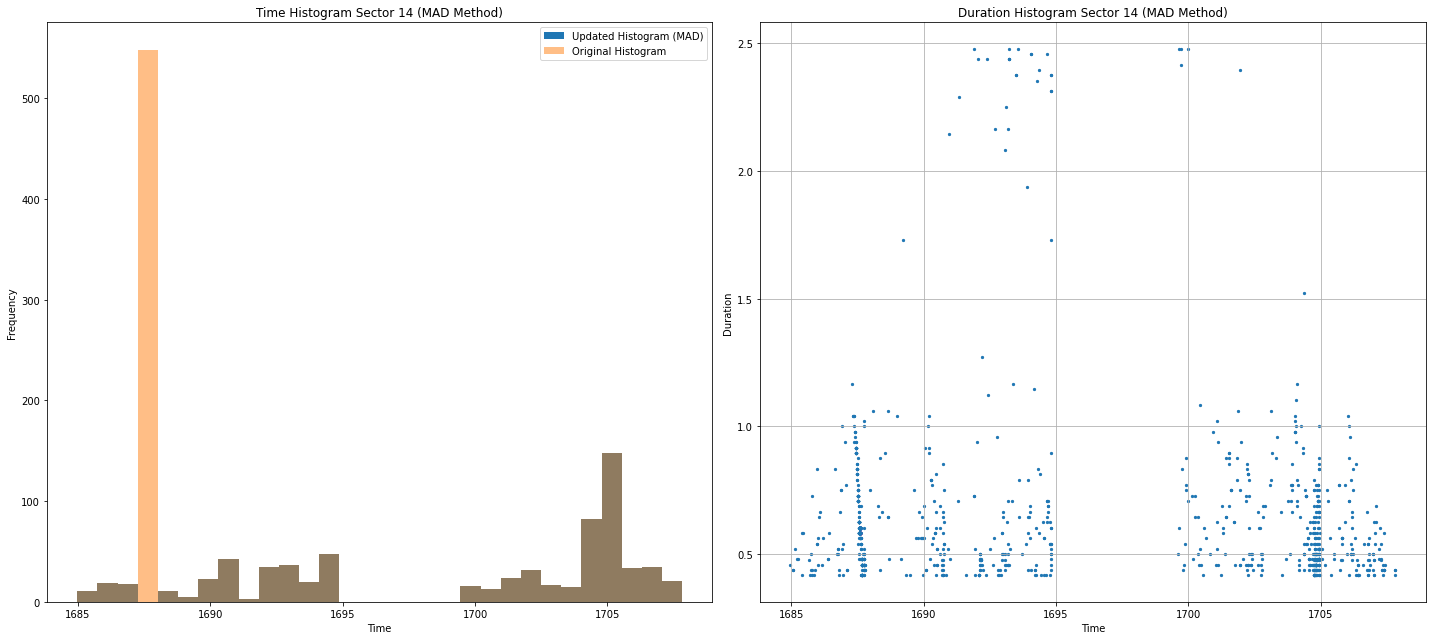

total candidates of Sector 14: 1257
total bad lcs: 548
Bins of bad lightcurves:
    Bin Range: 1687.257869 - 1688.019572


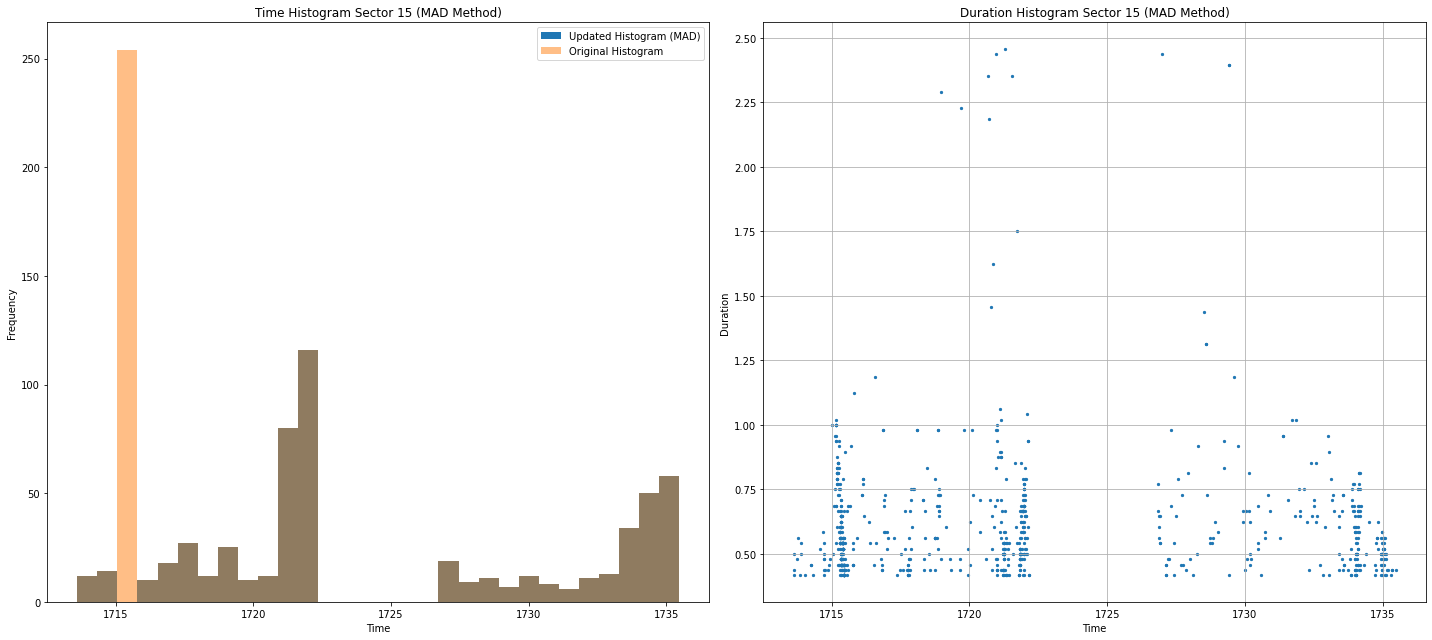

total candidates of Sector 15: 828
total bad lcs: 254
Bins of bad lightcurves:
    Bin Range: 1715.0688193333333 - 1715.797499


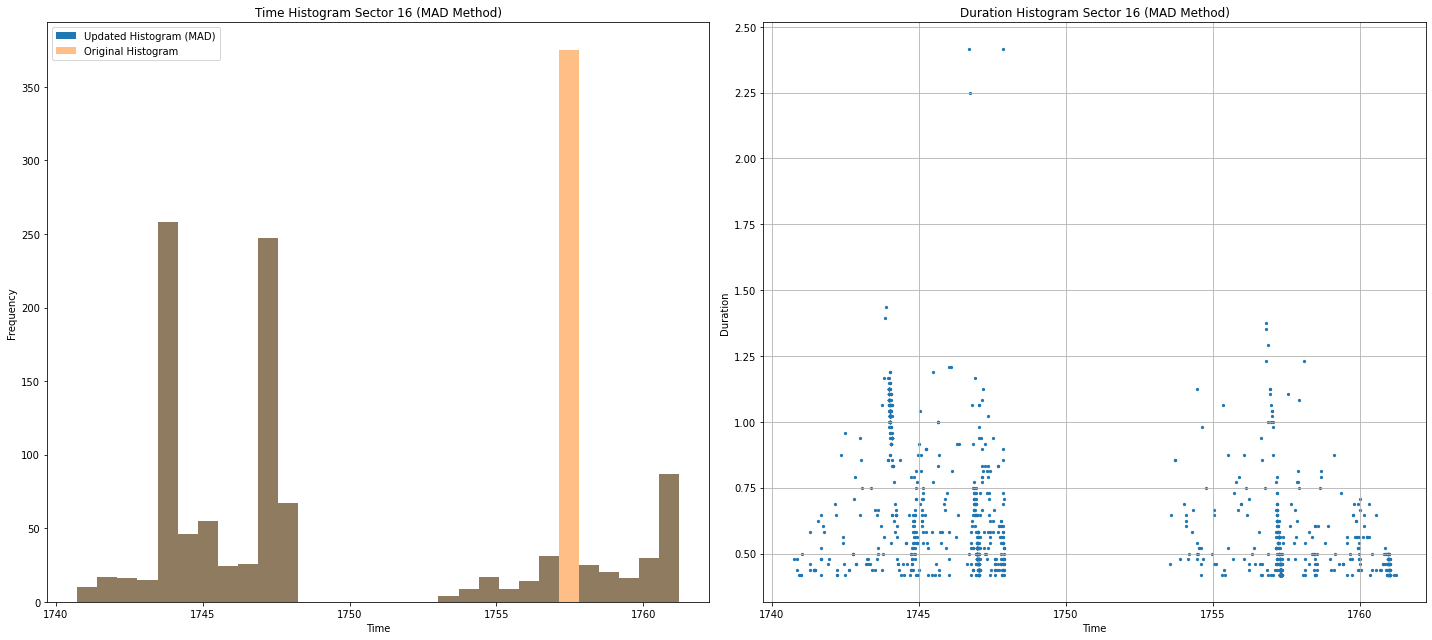

total candidates of Sector 16: 1418
total bad lcs: 375
Bins of bad lightcurves:
    Bin Range: 1757.1223479999999 - 1757.8050533333333


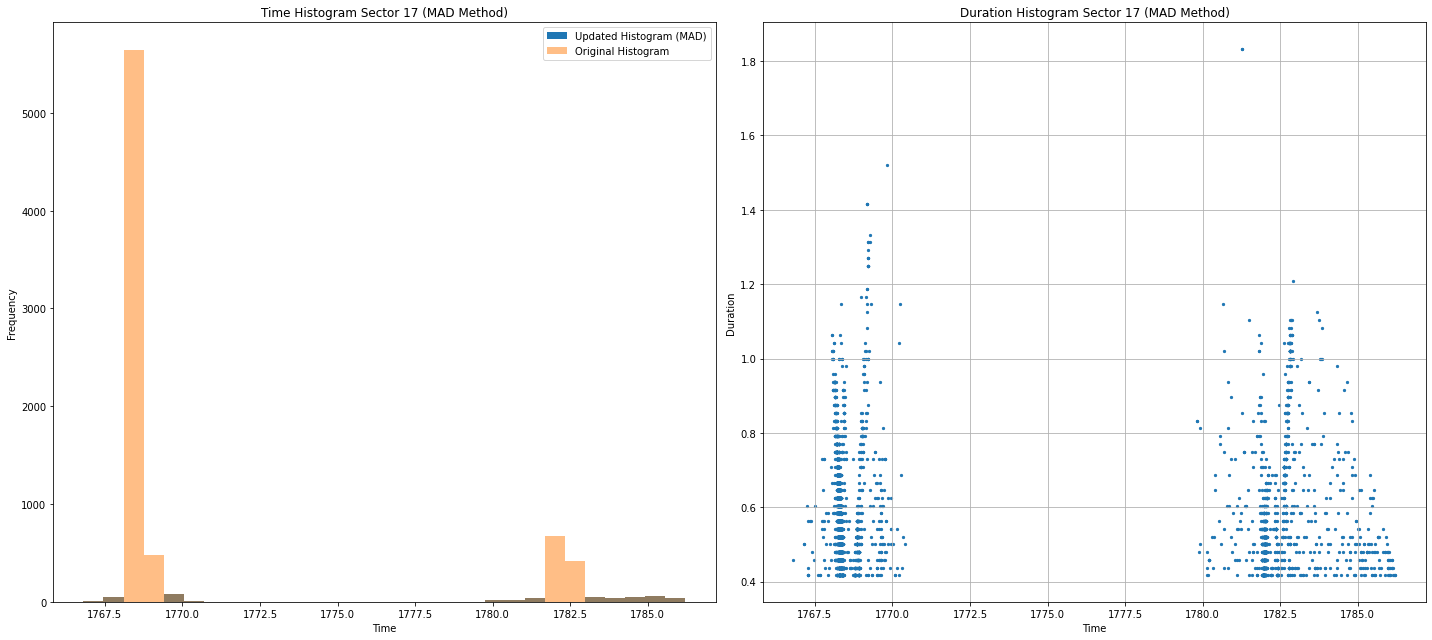

total candidates of Sector 17: 7668
total bad lcs: 7212
Bins of bad lightcurves:
    Bin Range: 1768.1019979999999 - 1768.749032
    Bin Range: 1768.749032 - 1769.396066
    Bin Range: 1781.6897119999999 - 1782.336746
    Bin Range: 1782.336746 - 1782.98378


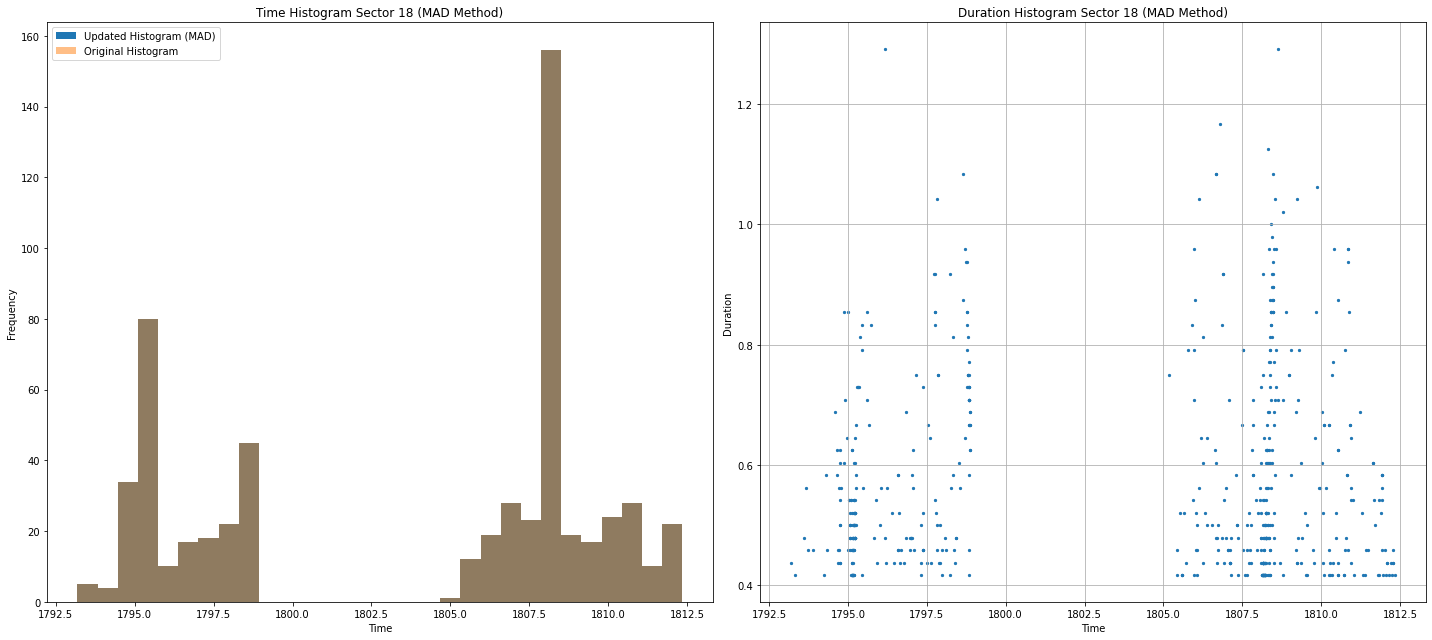

total candidates of Sector 18: 594
total bad lcs: 0
Bins of bad lightcurves:


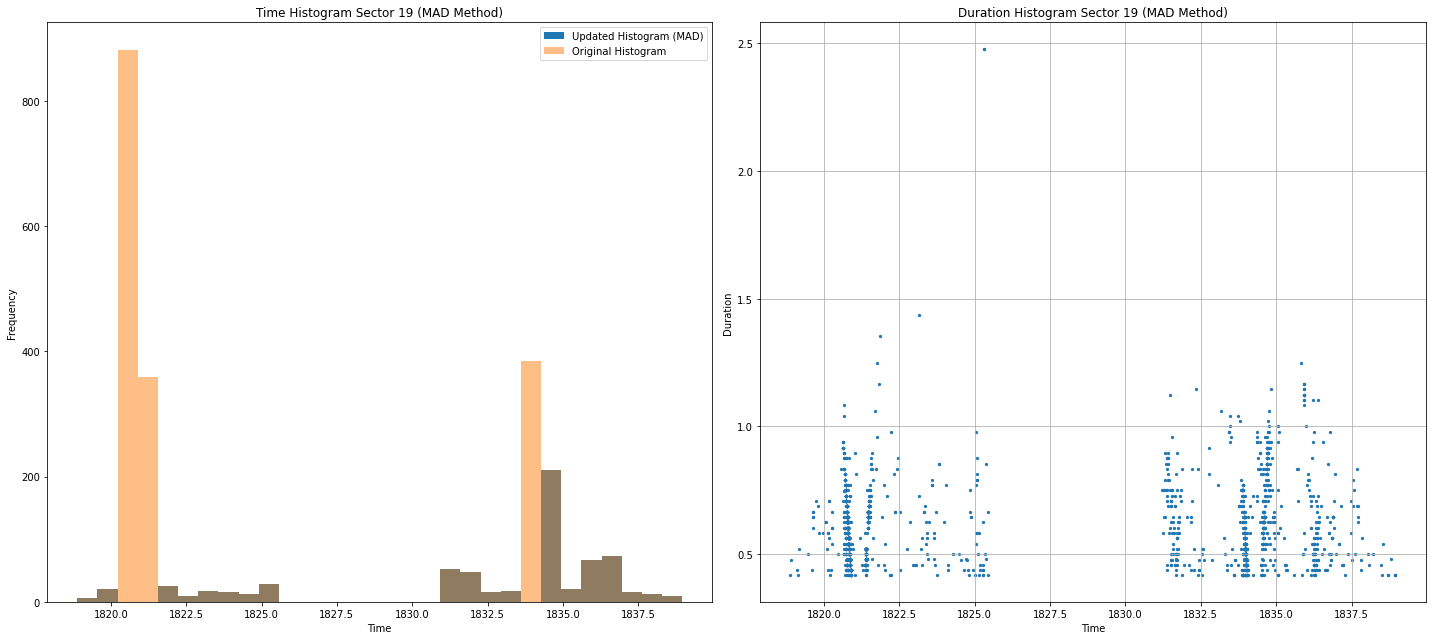

total candidates of Sector 19: 2302
total bad lcs: 1624
Bins of bad lightcurves:
    Bin Range: 1820.2285673333333 - 1820.897316
    Bin Range: 1820.8973159999998 - 1821.5660646666665
    Bin Range: 1833.6035406666667 - 1834.2722893333334


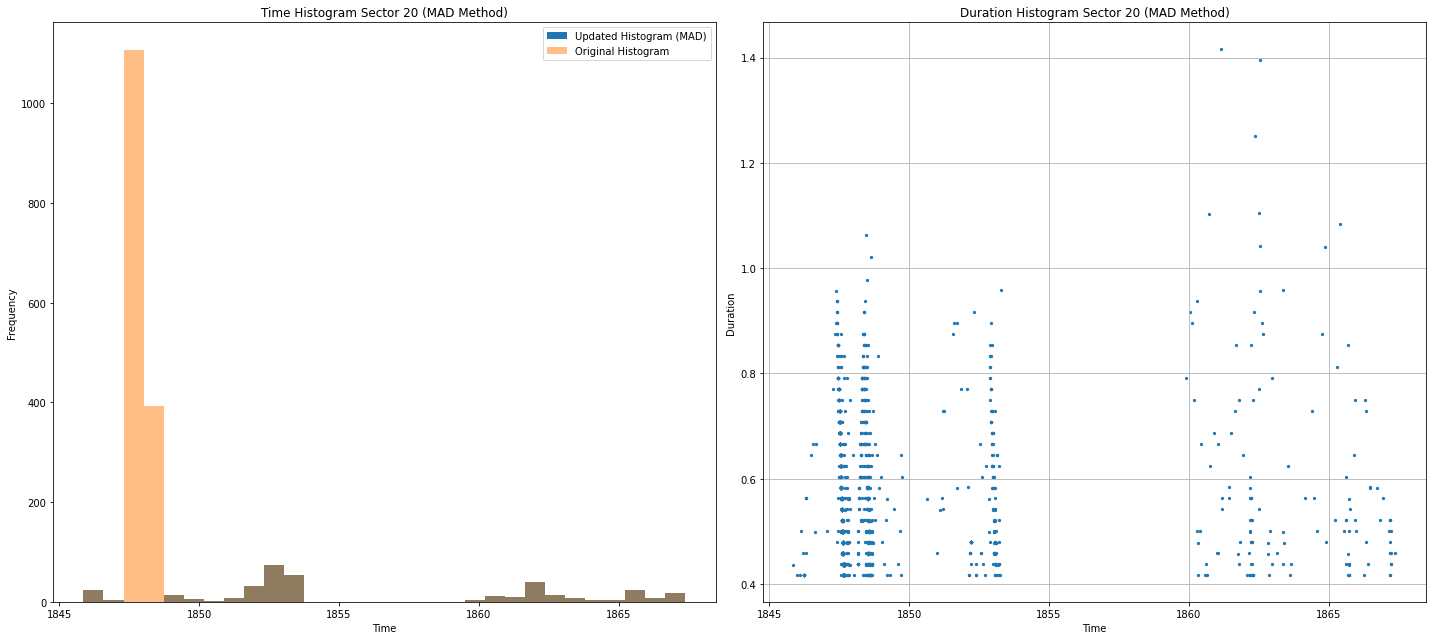

total candidates of Sector 20: 1854
total bad lcs: 1499
Bins of bad lightcurves:
    Bin Range: 1847.3010333333334 - 1848.0185250000002
    Bin Range: 1848.018525 - 1848.7360166666667


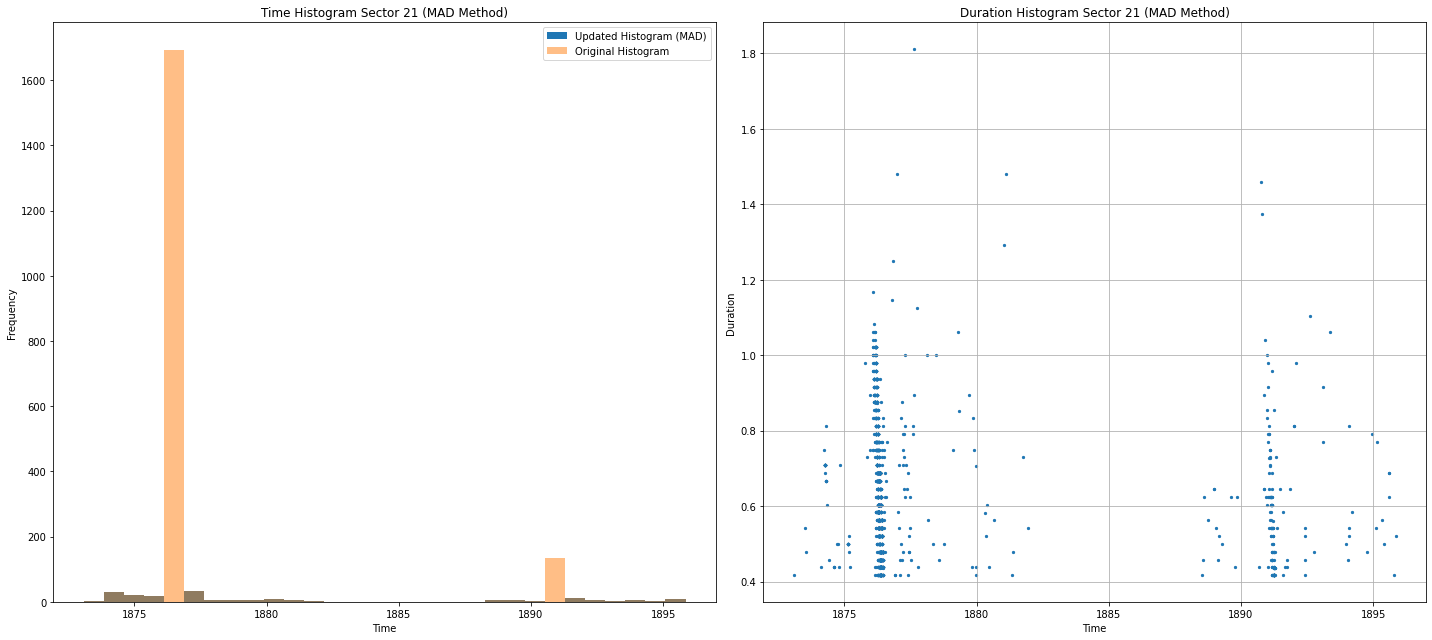

total candidates of Sector 21: 2016
total bad lcs: 1828
Bins of bad lightcurves:
    Bin Range: 1876.1099633333333 - 1876.8690416666666
    Bin Range: 1890.5324516666667 - 1891.29153


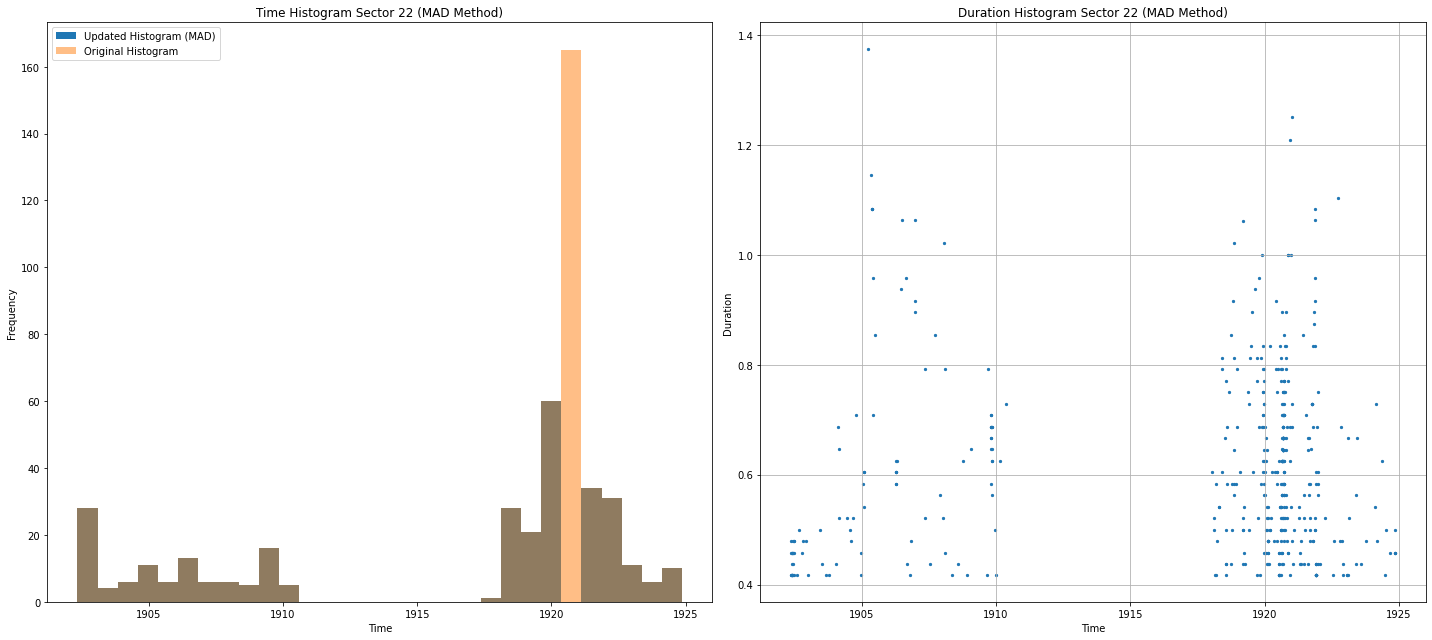

total candidates of Sector 22: 473
total bad lcs: 165
Bins of bad lightcurves:
    Bin Range: 1920.365382 - 1921.116115


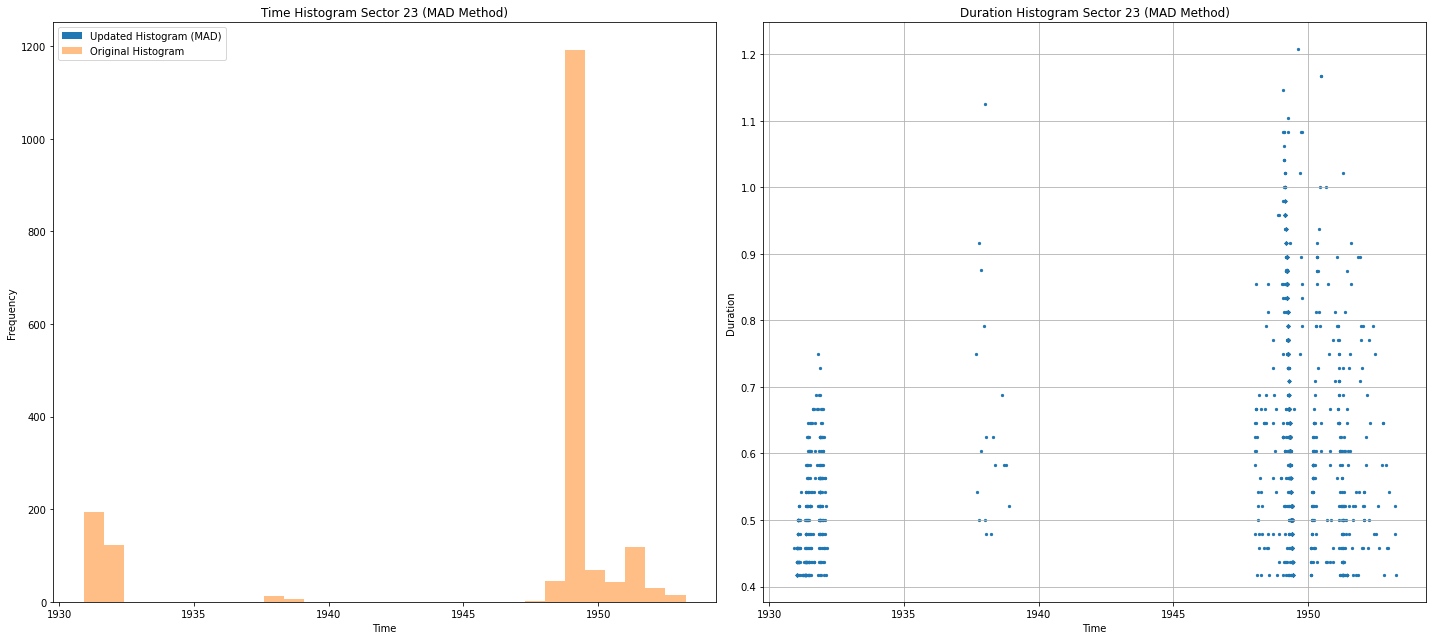

total candidates of Sector 23: 1843
total bad lcs: 1843
Bins of bad lightcurves:
    Bin Range: 1930.90767 - 1931.6521166666666
    Bin Range: 1931.6521166666666 - 1932.3965633333332
    Bin Range: 1937.60769 - 1938.3521366666666
    Bin Range: 1938.3521366666666 - 1939.0965833333332
    Bin Range: 1947.2854966666666 - 1948.0299433333332
    Bin Range: 1948.0299433333334 - 1948.77439
    Bin Range: 1948.77439 - 1949.5188366666666
    Bin Range: 1949.5188366666666 - 1950.2632833333332
    Bin Range: 1950.2632833333334 - 1951.00773
    Bin Range: 1951.00773 - 1951.7521766666666
    Bin Range: 1951.7521766666666 - 1952.4966233333332
    Bin Range: 1952.4966233333334 - 1953.24107


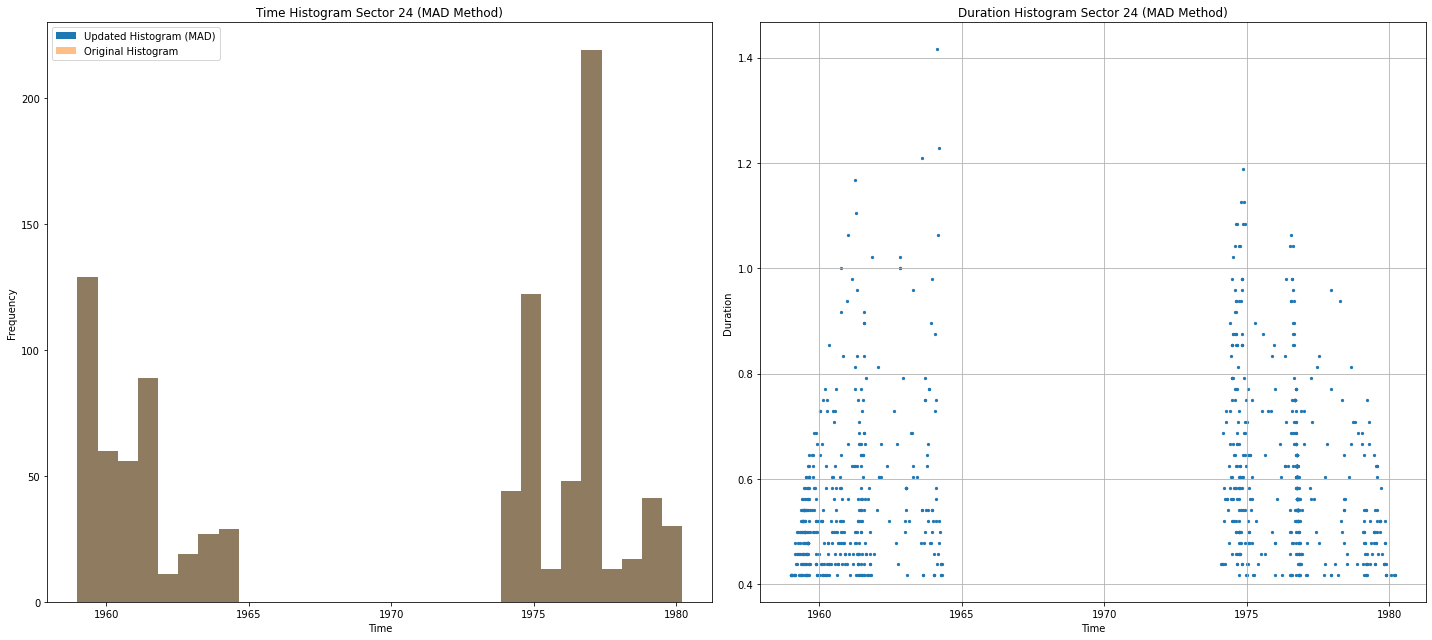

total candidates of Sector 24: 967
total bad lcs: 0
Bins of bad lightcurves:


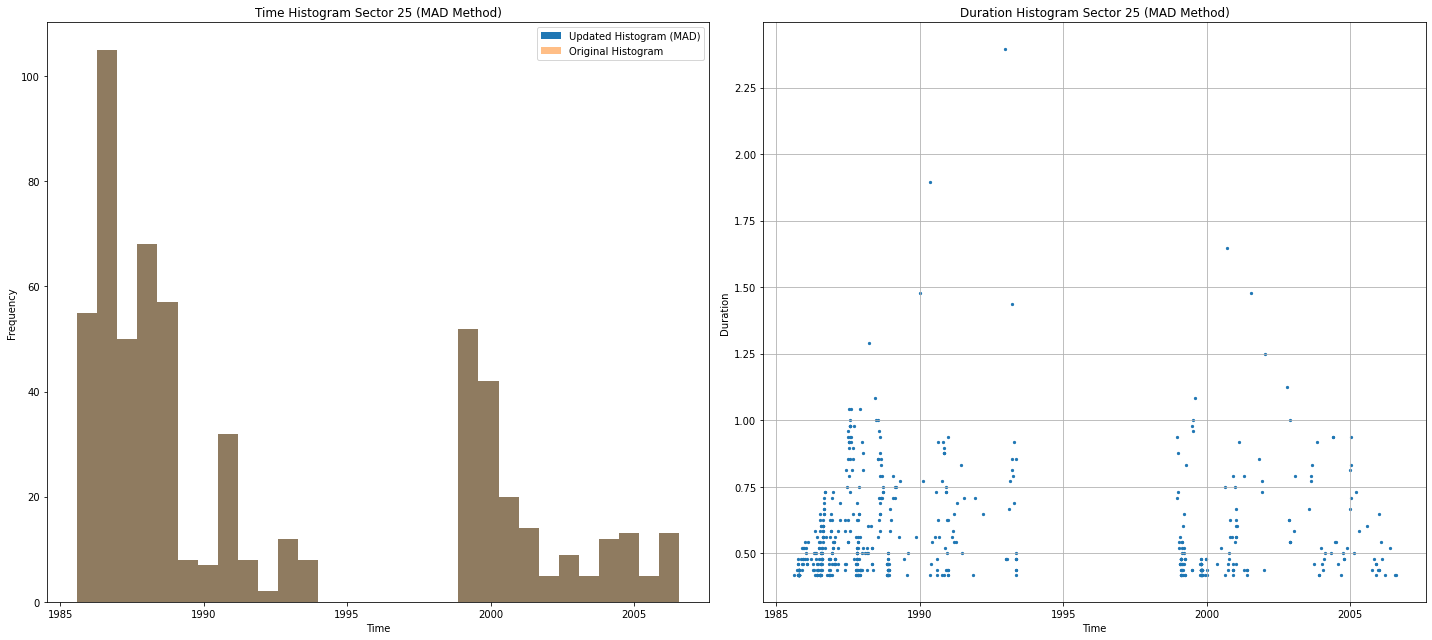

total candidates of Sector 25: 602
total bad lcs: 0
Bins of bad lightcurves:


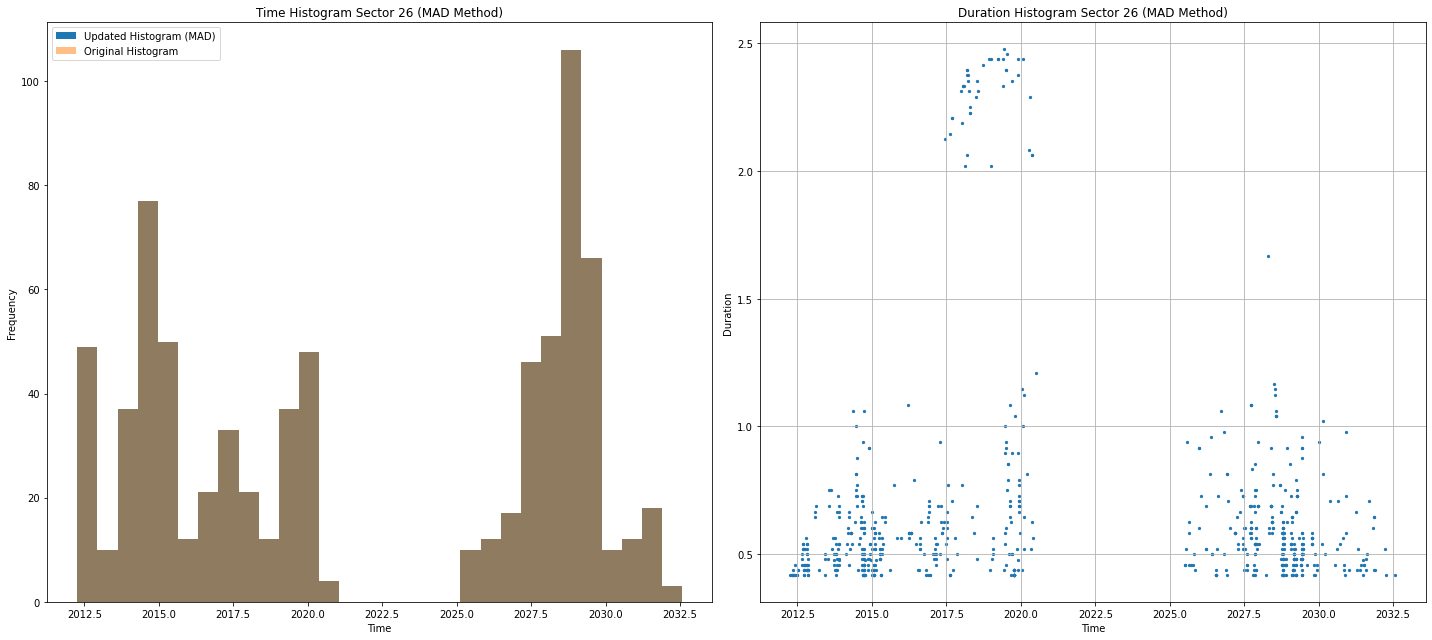

total candidates of Sector 26: 762
total bad lcs: 0
Bins of bad lightcurves:


In [3]:
# Assuming 'data_new' is your DataFrame with the 'time' column
# Replace this with your actual DataFrame
data_new = pd.DataFrame({'time': [...]})  # Replace [...] with your 'time' data

for sector in range(1,27):
    # Construct the dataframe variable name
    dataframe_name = 'sector_' + str(sector)
    
    # Access the dataframe using globals() and the constructed variable name
    data = globals()[dataframe_name]
    data = data[data.transit_prob == 'maybeTransit']
    data = data[(data.asym_score <= 3)].reset_index(drop=True)
    data_new = data[abs(data.snr) >= 5].reset_index(drop=True)
    data_new.drop(data_new[data_new['duration'] <= 0.4].index, inplace=True)
    data_new['abs_depth'] = abs(data_new.depth)
    data_new.drop(data_new[(data_new['abs_depth'] >= 0.1)].index, inplace=True)
    
    # Calculate the histogram values and bin edges using np.histogram
    time_histogram, bin_edges = np.histogram(data_new['time'], bins=30)
    
    # Method 1: Median Absolute Deviation (MAD)
    ## calculate median, mad, and then mad threshold
    median = np.median(time_histogram)
    mad = np.median(np.abs(time_histogram - median)) # median of absolute deviations from the median
    mad_threshold = 20 * mad
    mad_anomalous_bins = [i for i, value in enumerate(time_histogram) if np.abs(value - median) > mad_threshold] # index of bins of the anomalous data
    
    # bins of anomalous data
    anomalous_bins = np.abs(time_histogram - median) > mad_threshold
    
    # Calculate the counts in the anomalous bins
    anomalous_counts = time_histogram[anomalous_bins]
    total_anomalous_count = np.sum(anomalous_counts)

    
    # Extract the bin edges corresponding to the anomalous bins
    anomalous_bin_edges = bin_edges[:-1][anomalous_bins]

    # Calculate the left edge of the anomalous bins
    anomalous_bin_left_edges = anomalous_bin_edges
    
    # Calculate the width of each bin
    bin_width = bin_edges[1] - bin_edges[0]

    # Calculate the right edge of the anomalous bins
    anomalous_bin_right_edges = anomalous_bin_edges + bin_width

    for i in mad_anomalous_bins:
        time_histogram[i] = 0  # Set to zero or any other appropriate value
        
    # Create a boolean mask to identify rows in the DataFrame that belong to anomalous bins
    anomalous_mask = np.zeros(len(data_new), dtype=bool)

    for left_bin, right_bin in zip(anomalous_bin_left_edges, anomalous_bin_right_edges):
        # Check if 'time' values in each row fall within the current anomalous bin
        anomalous_mask |= (data_new['time'] >= left_bin) & (data_new['time'] <= right_bin)

    # Invert the mask to get rows that are NOT in anomalous bins
    non_anomalous_rows = ~anomalous_mask
    # Filter your DataFrame to keep only non-anomalous rows
    
    #data_to_export = data_new[~(data_new.time >= 1948.77439) & (data_new.time <= 1949.5188366666666)] 
    
    
    data_to_export = data_new[non_anomalous_rows]    
    
    
    #try:
    #    os.makedirs('../outputs_updated/')
    #except FileExistsError:
    #    pass
    #data_to_export['abs_path'] = data_to_export['path'].str.replace('/tmp/tess/', '/storage/astro2/phrdhx/tesslcs/')
    #data_to_export.to_csv(f'../outputs_updated/s{sector}.txt',index=False)


    # Create a subplot
    fig, ax = plt.subplots(1,2, figsize=(20, 9))
    
    # Plot the updated histogram including all columns (MAD method)
    ax[0].hist(bin_edges[:-1], bins=bin_edges, weights=time_histogram, label='Updated Histogram (MAD)')
    
    # Plot the original 'data_new.time' histogram
    ax[0].hist(data_new['time'], bins=bin_edges, alpha=0.5, label='Original Histogram')
    
    ax[0].set_title('Time Histogram Sector {} (MAD Method)'.format(sector))
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Frequency')
    ax[0].legend()
    
    
    ax[1].scatter(data_new.time,data_new.duration,s=5)
    ax[1].set_title('Duration Histogram Sector {} (MAD Method)'.format(sector))
    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('Duration')
    
    
    # Adjust layout to prevent overlapping of titles and labels
    plt.tight_layout()
    plt.grid()
    # Show the subplot
    plt.show()
                           
    print(f"total candidates of Sector {sector}: {len(data_new)}")
    print(f"total bad lcs: {total_anomalous_count}")
    print("Bins of bad lightcurves:")
    for left_bin, right_bin in zip(anomalous_bin_left_edges, anomalous_bin_right_edges):
        print(f"    Bin Range: {left_bin} - {right_bin}")



## Iterative MAD

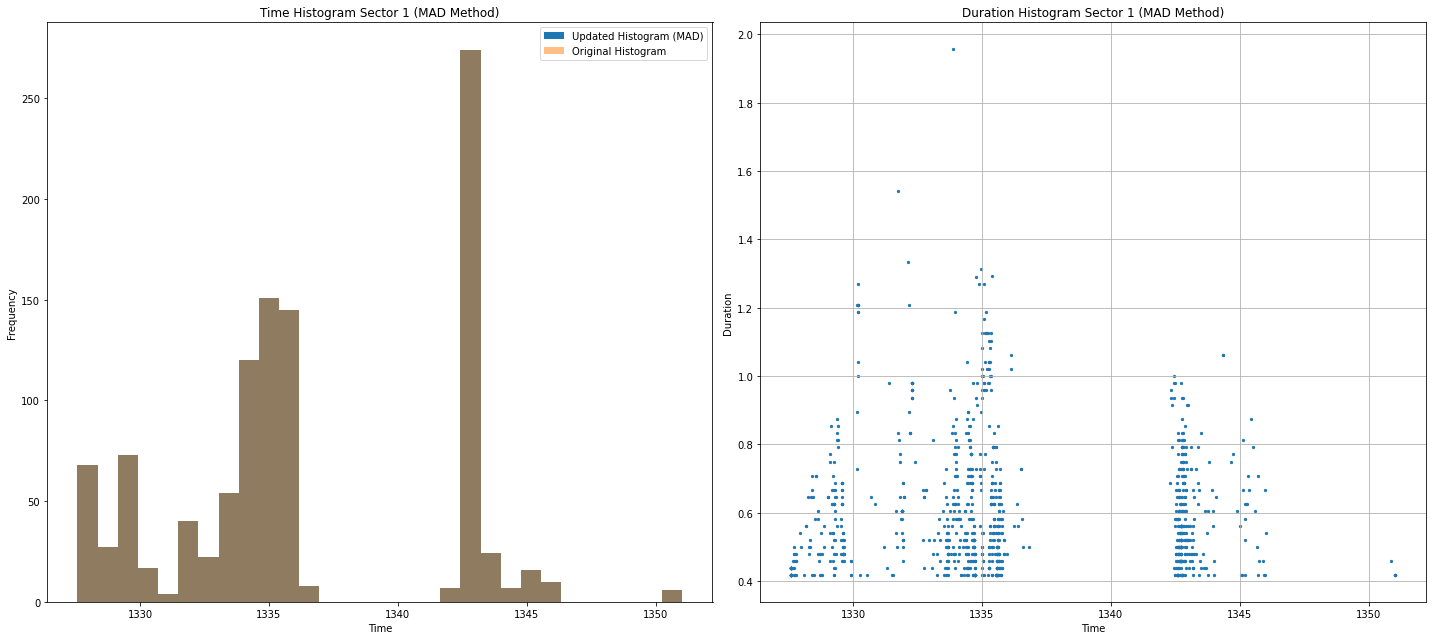

total candidates of Sector 1: 1073


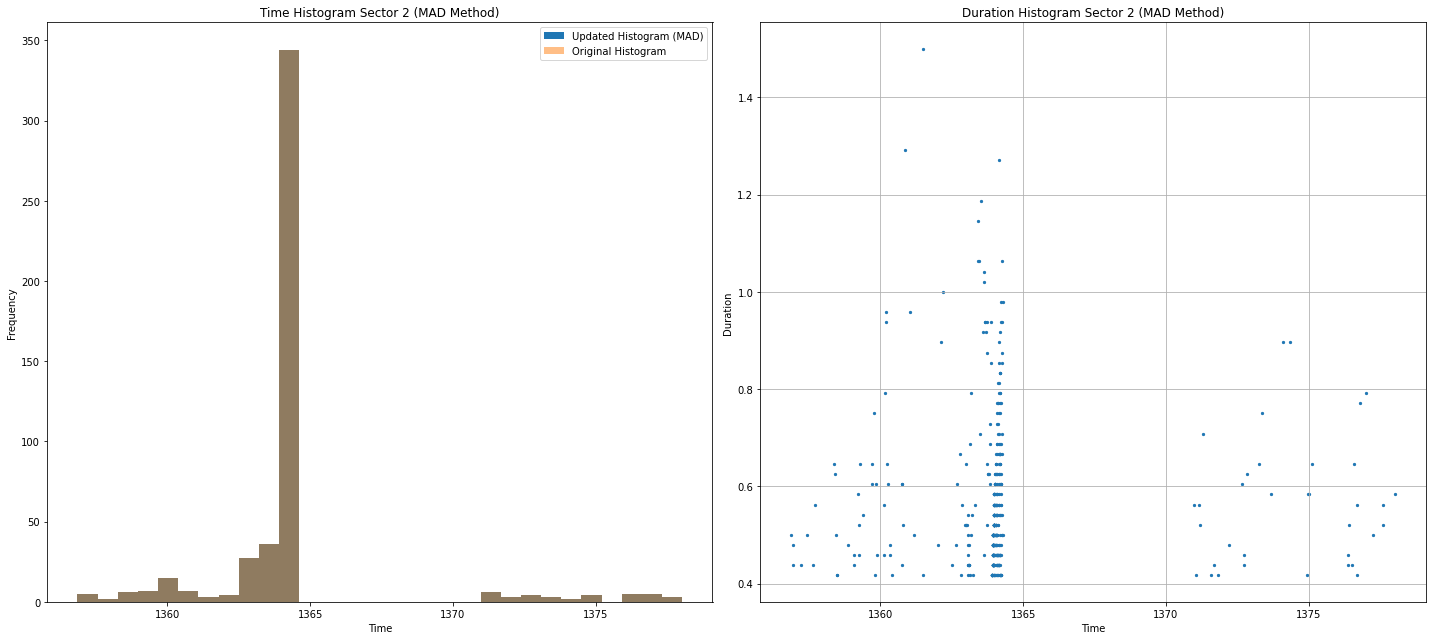

total candidates of Sector 2: 491


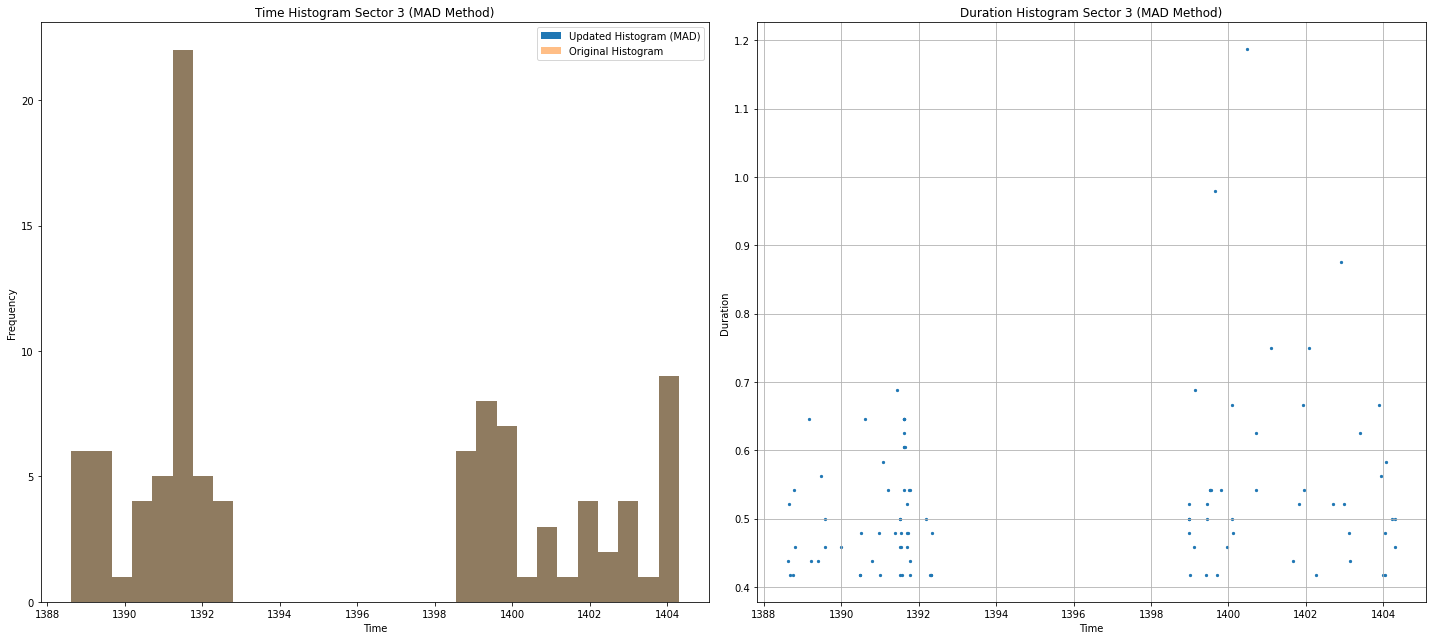

total candidates of Sector 3: 99


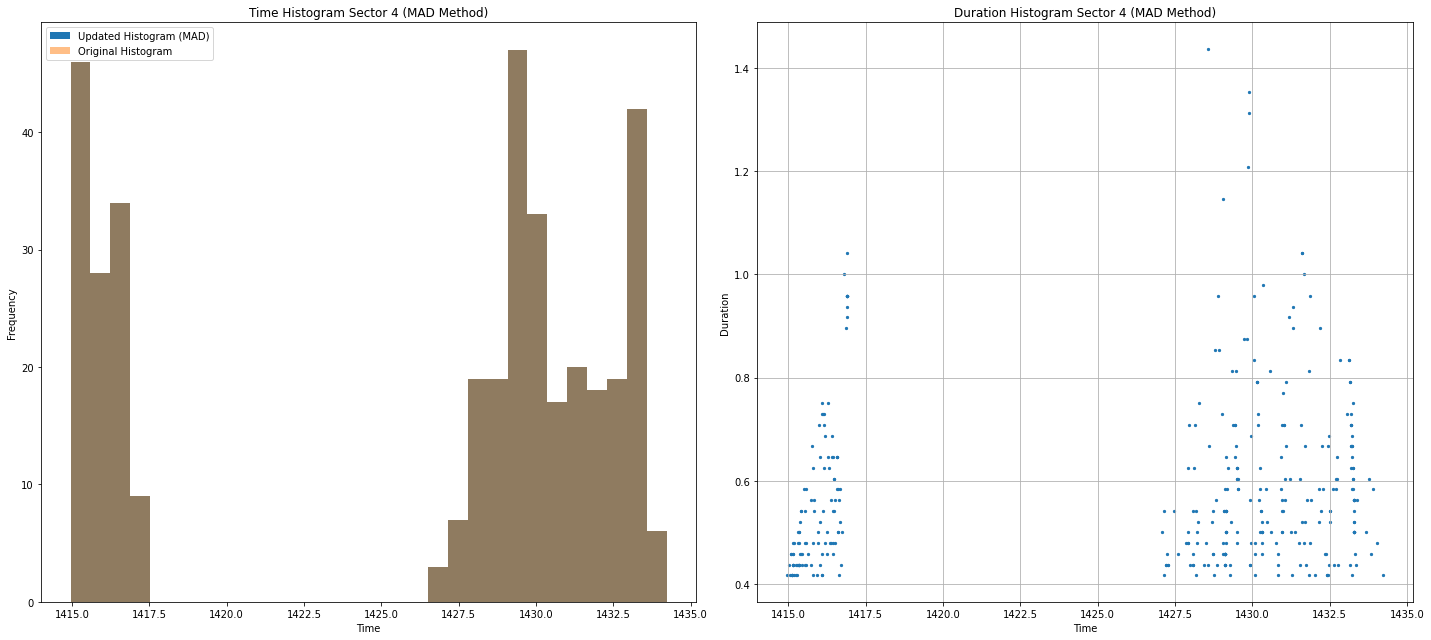

total candidates of Sector 4: 367


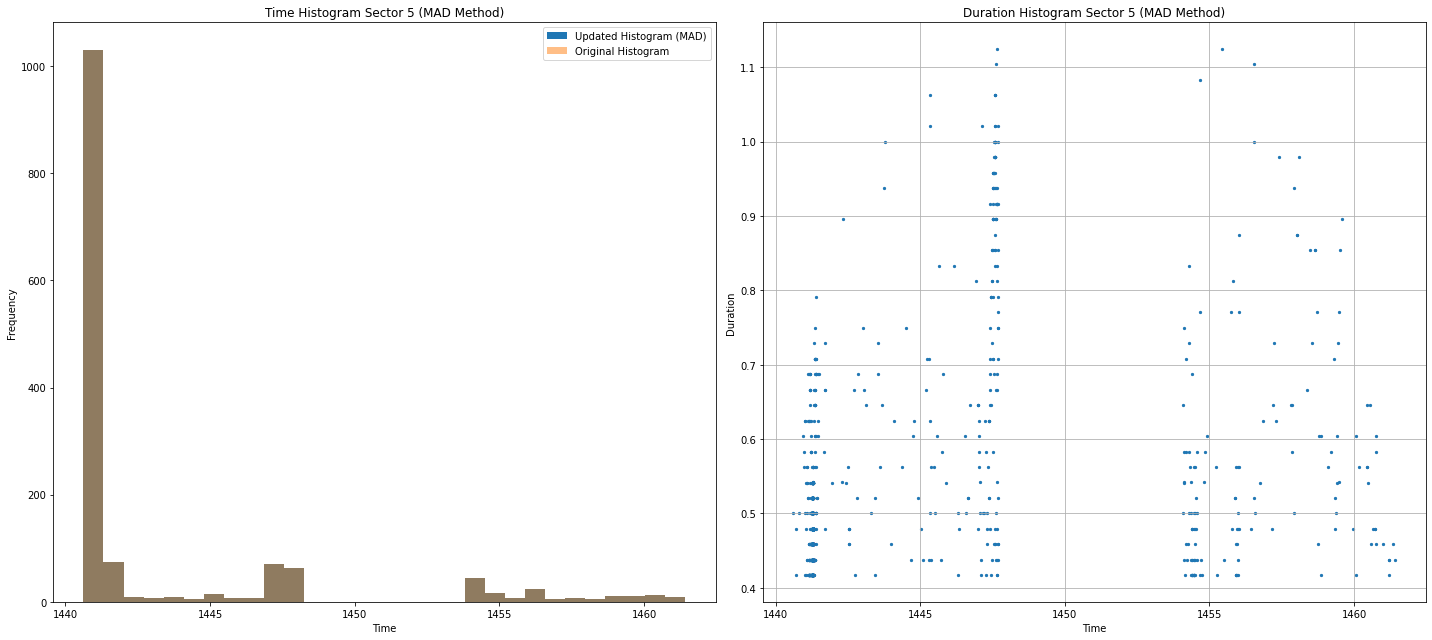

total candidates of Sector 5: 1453


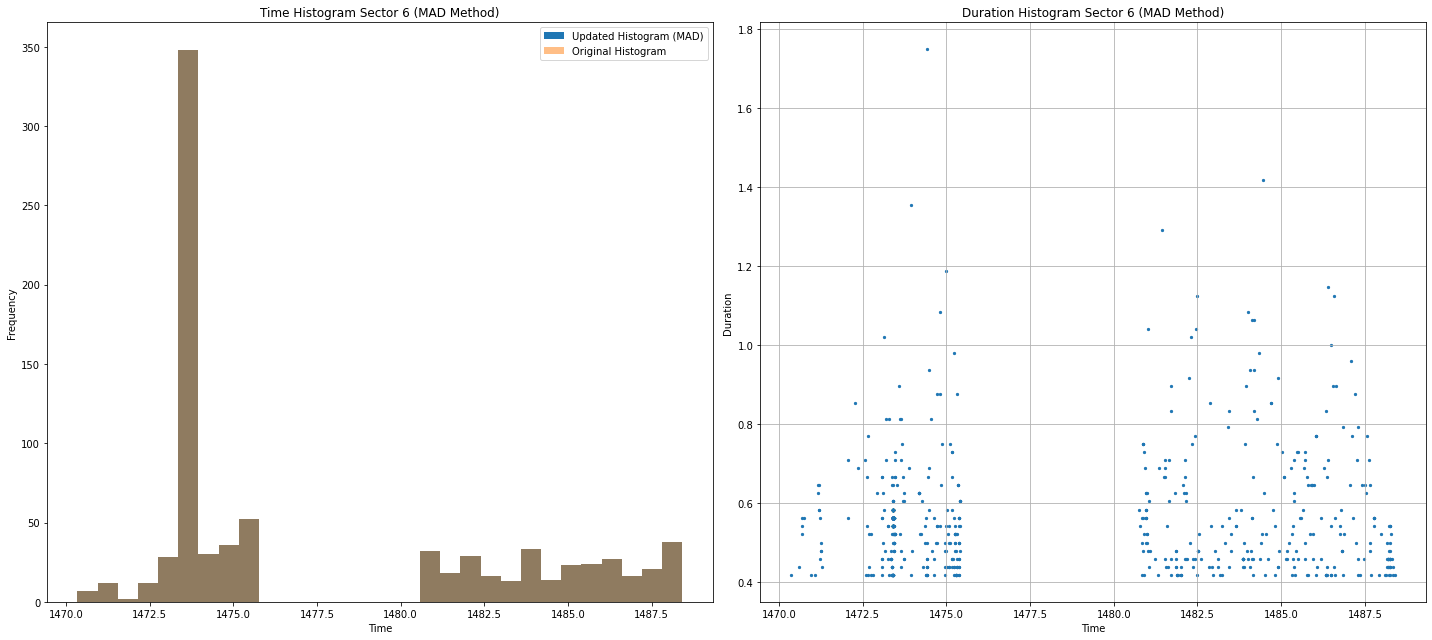

total candidates of Sector 6: 831


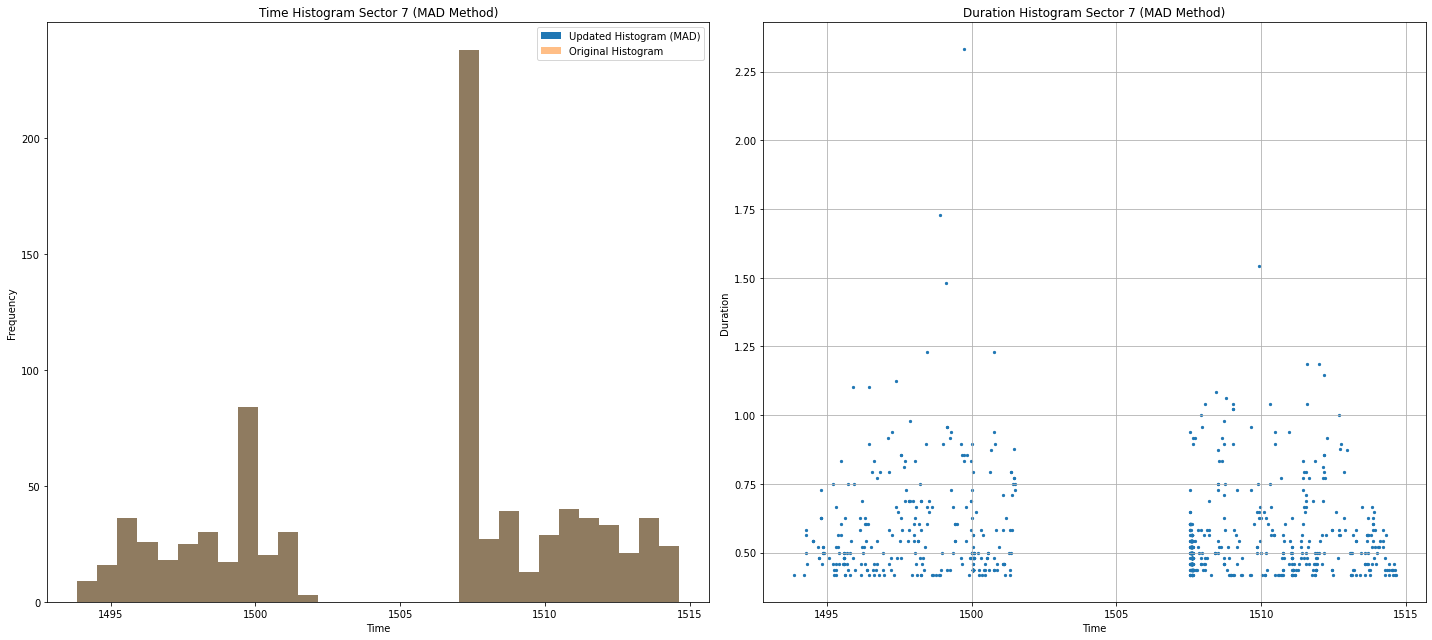

total candidates of Sector 7: 850


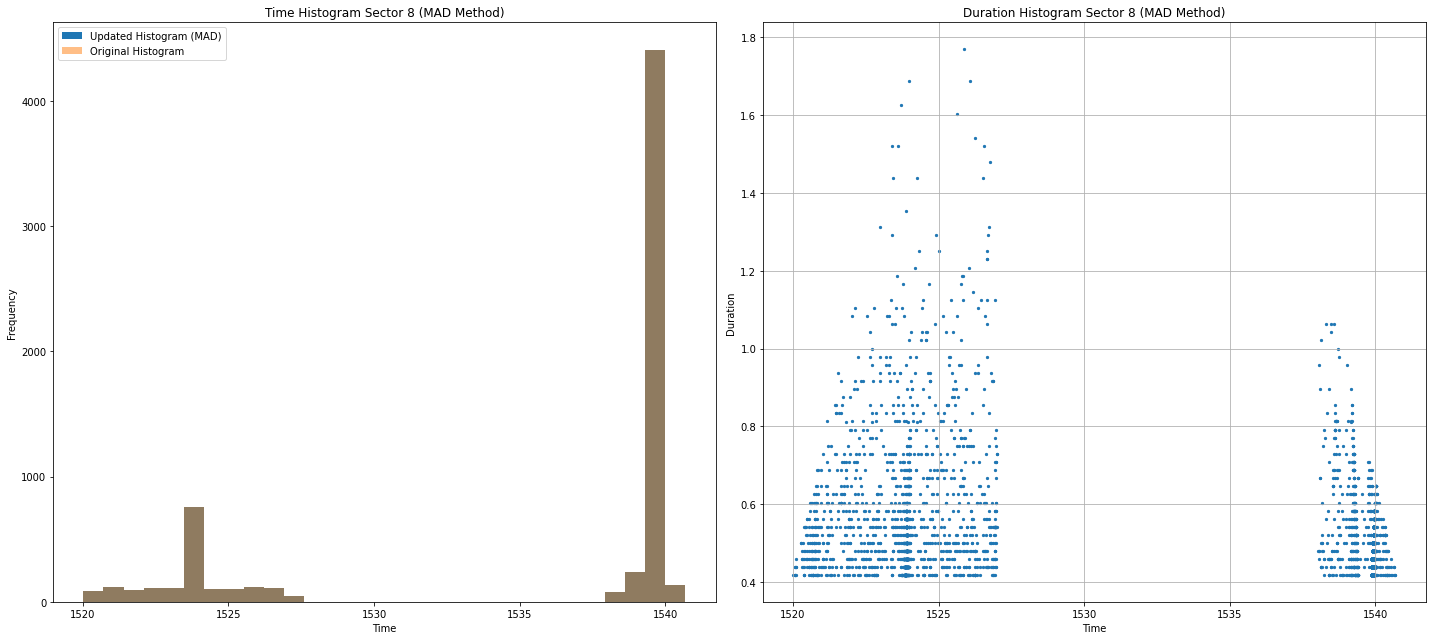

total candidates of Sector 8: 6610


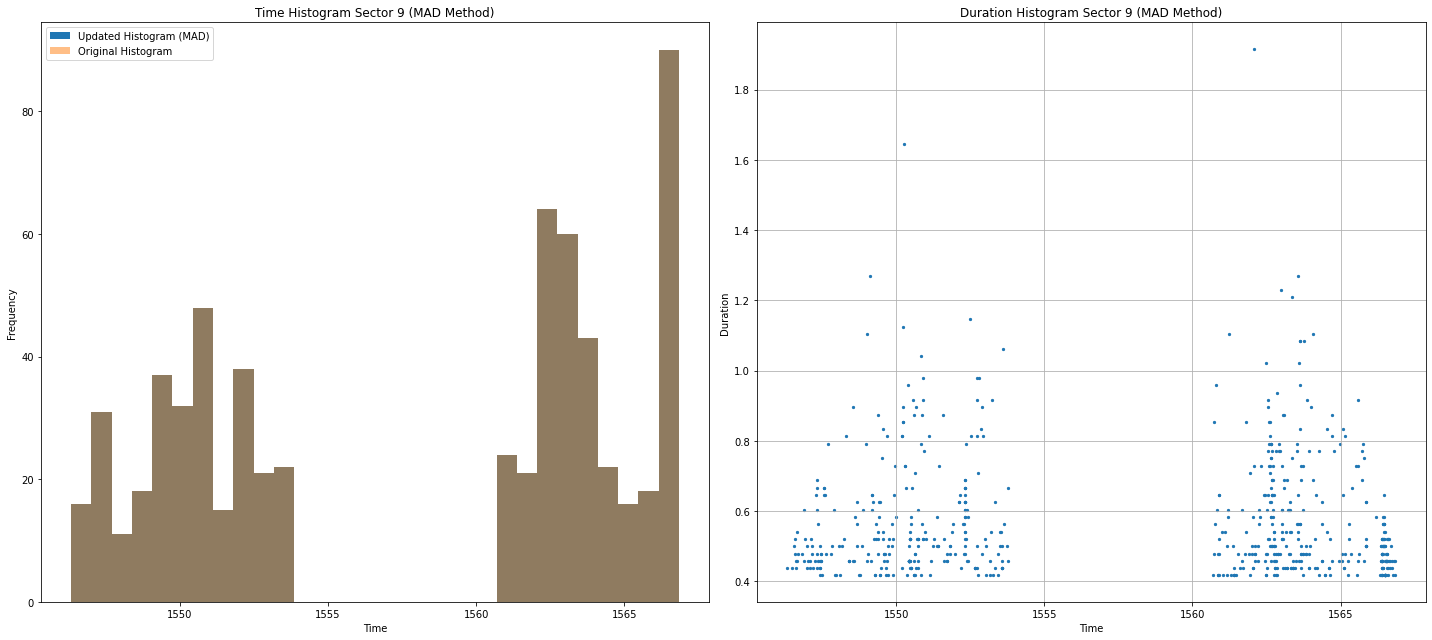

total candidates of Sector 9: 647


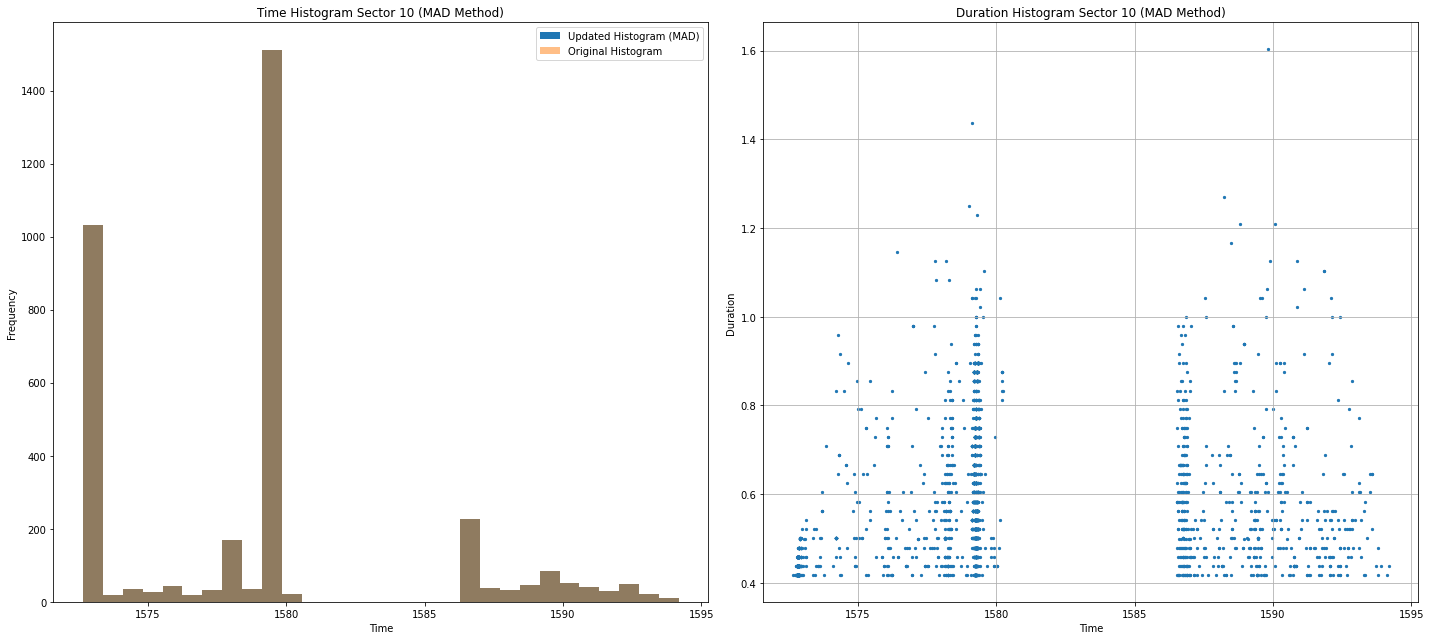

total candidates of Sector 10: 3572


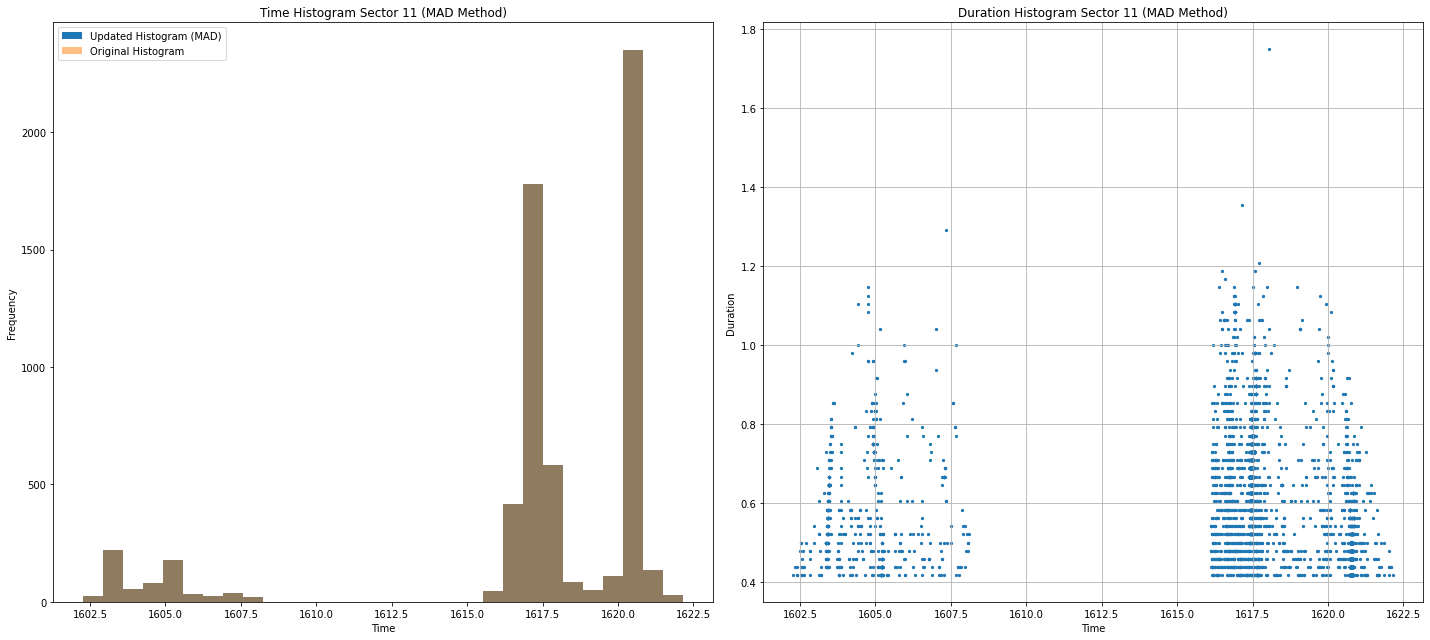

total candidates of Sector 11: 6258


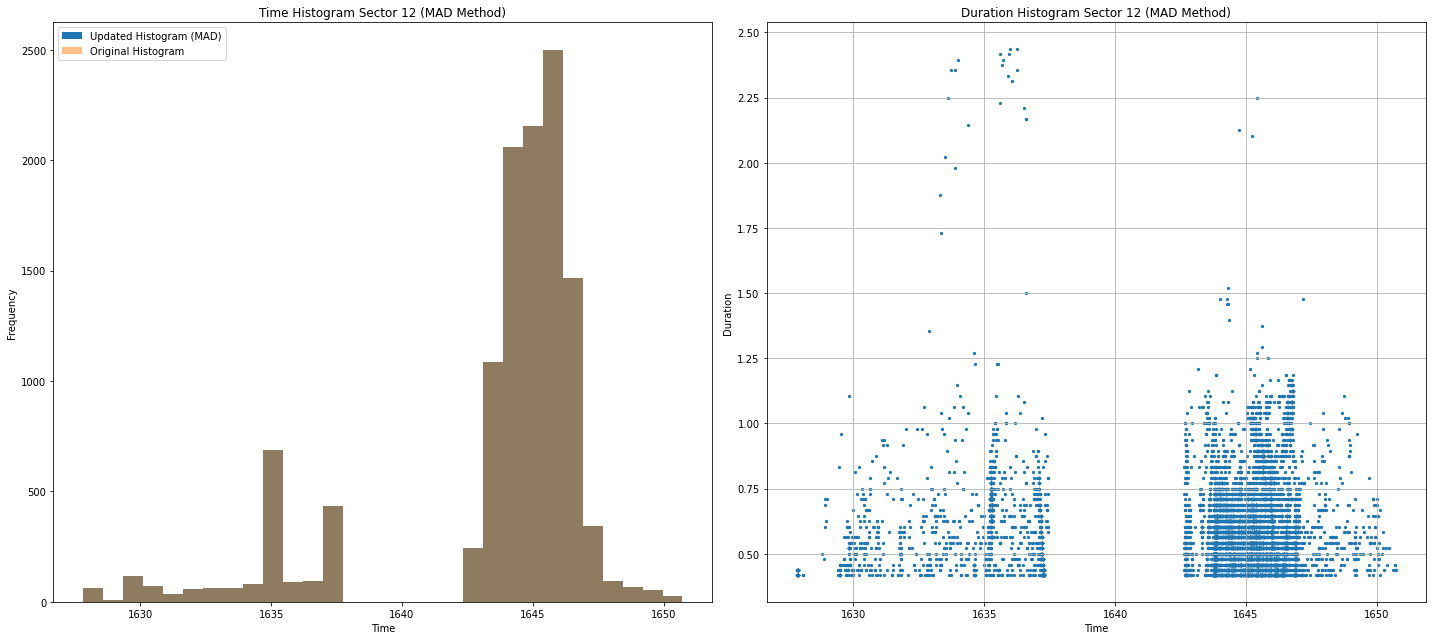

total candidates of Sector 12: 11957


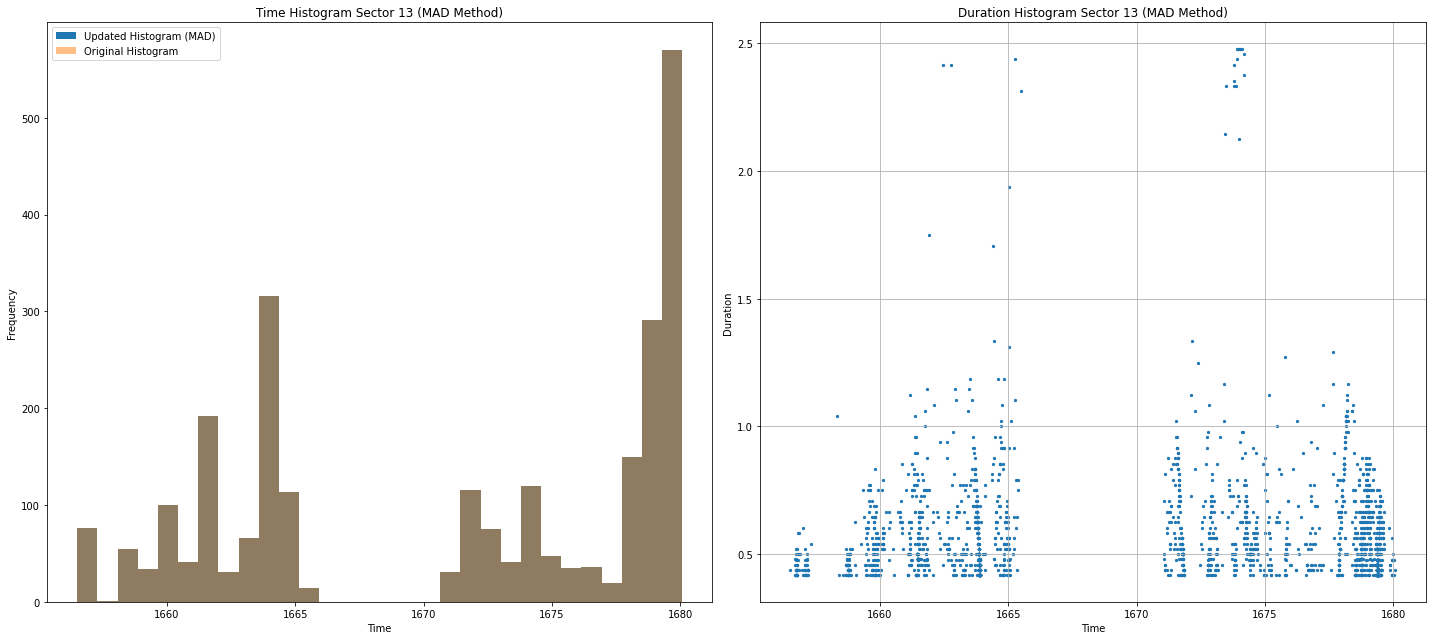

total candidates of Sector 13: 2570


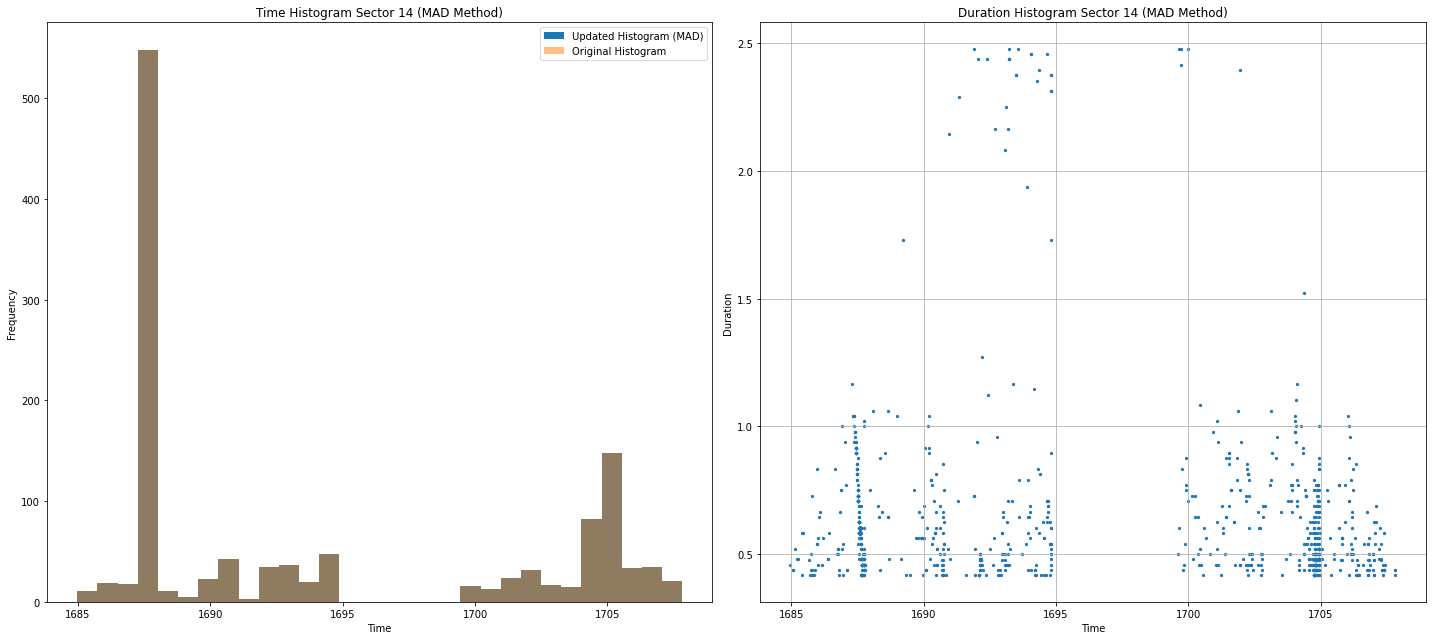

total candidates of Sector 14: 1257


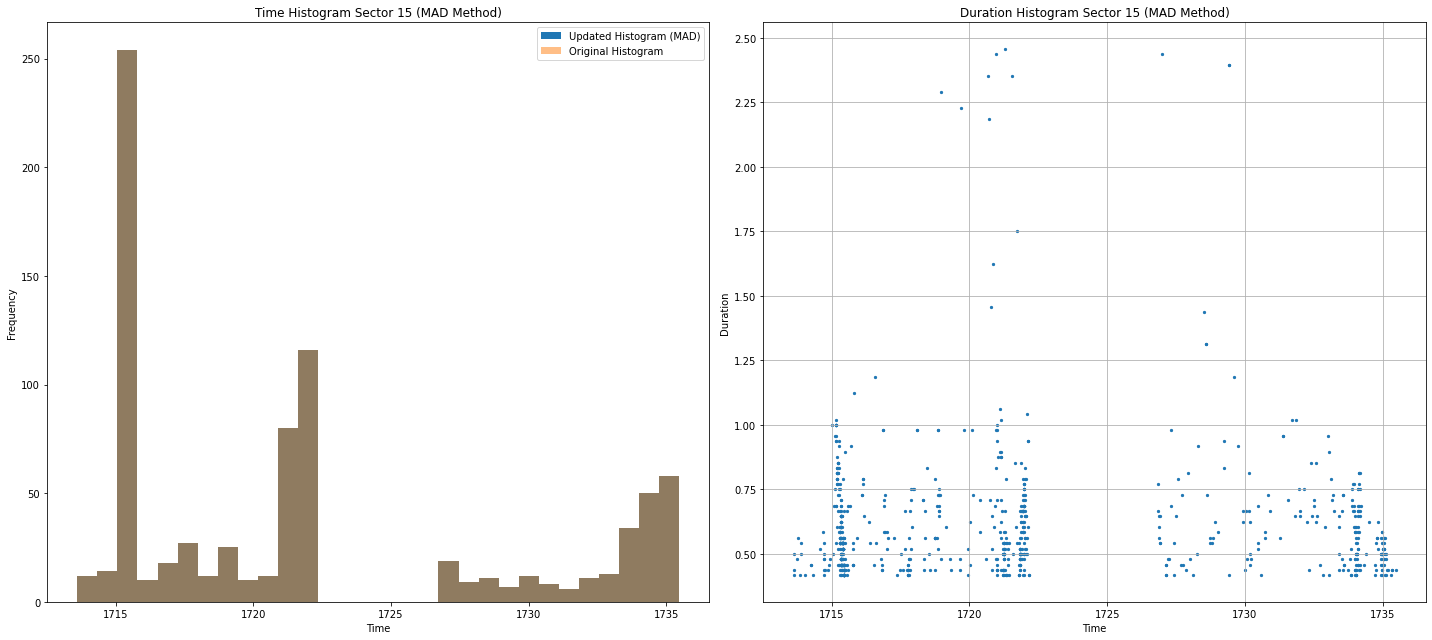

total candidates of Sector 15: 828


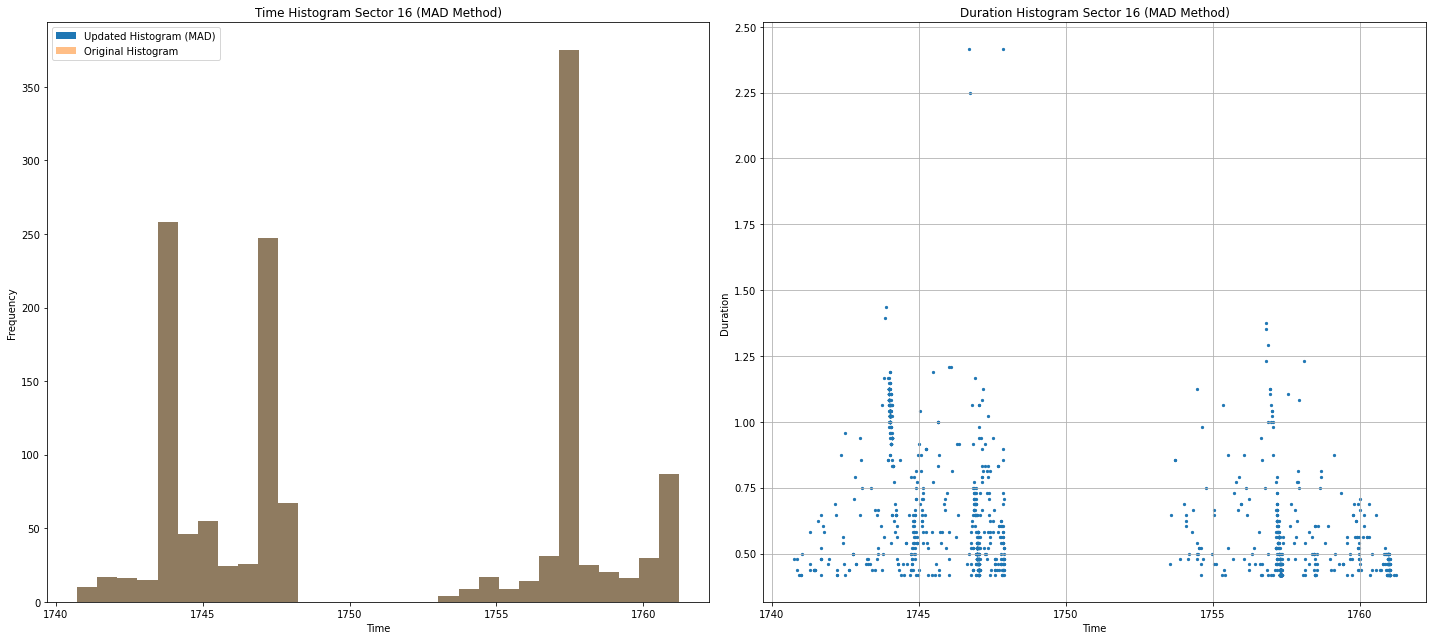

total candidates of Sector 16: 1418


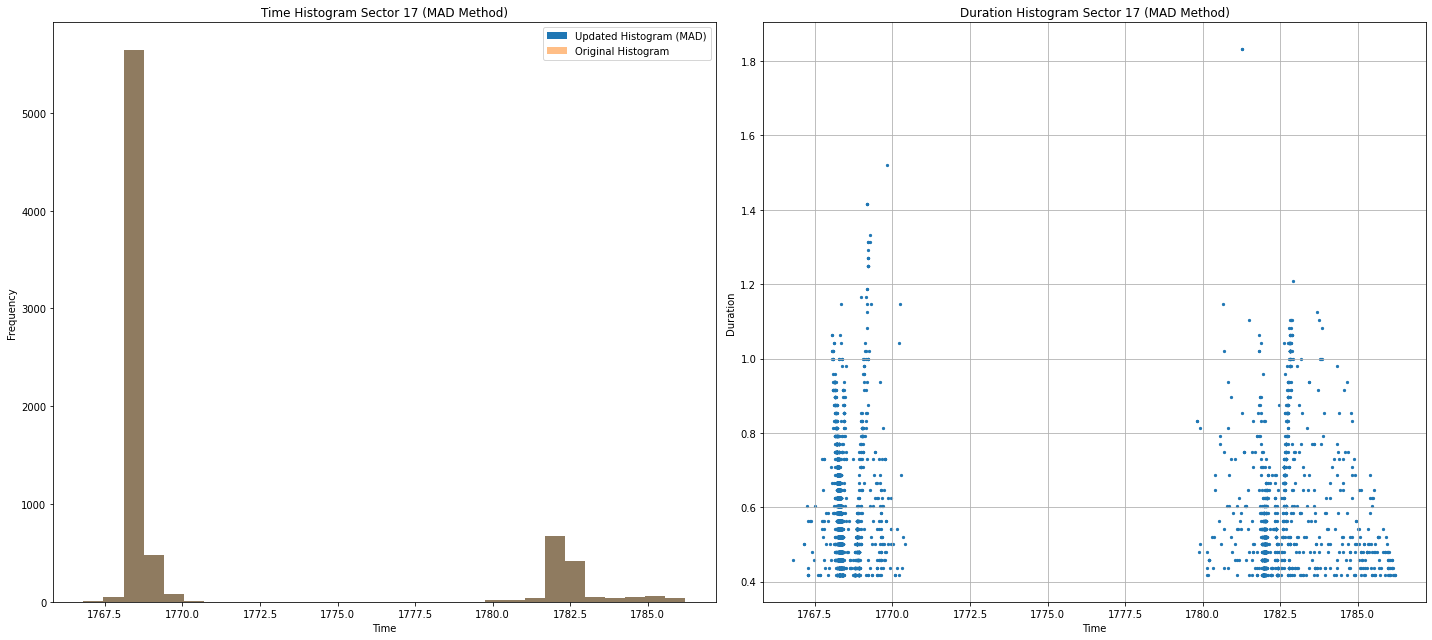

total candidates of Sector 17: 7668


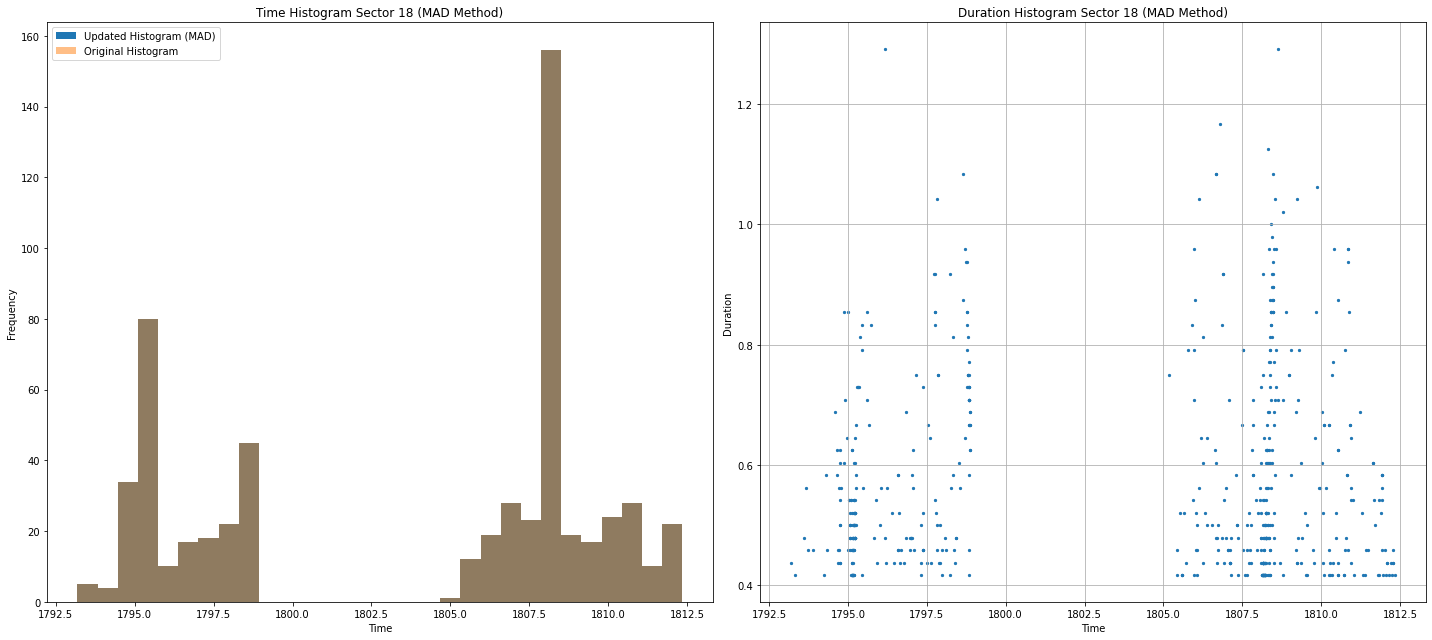

total candidates of Sector 18: 594


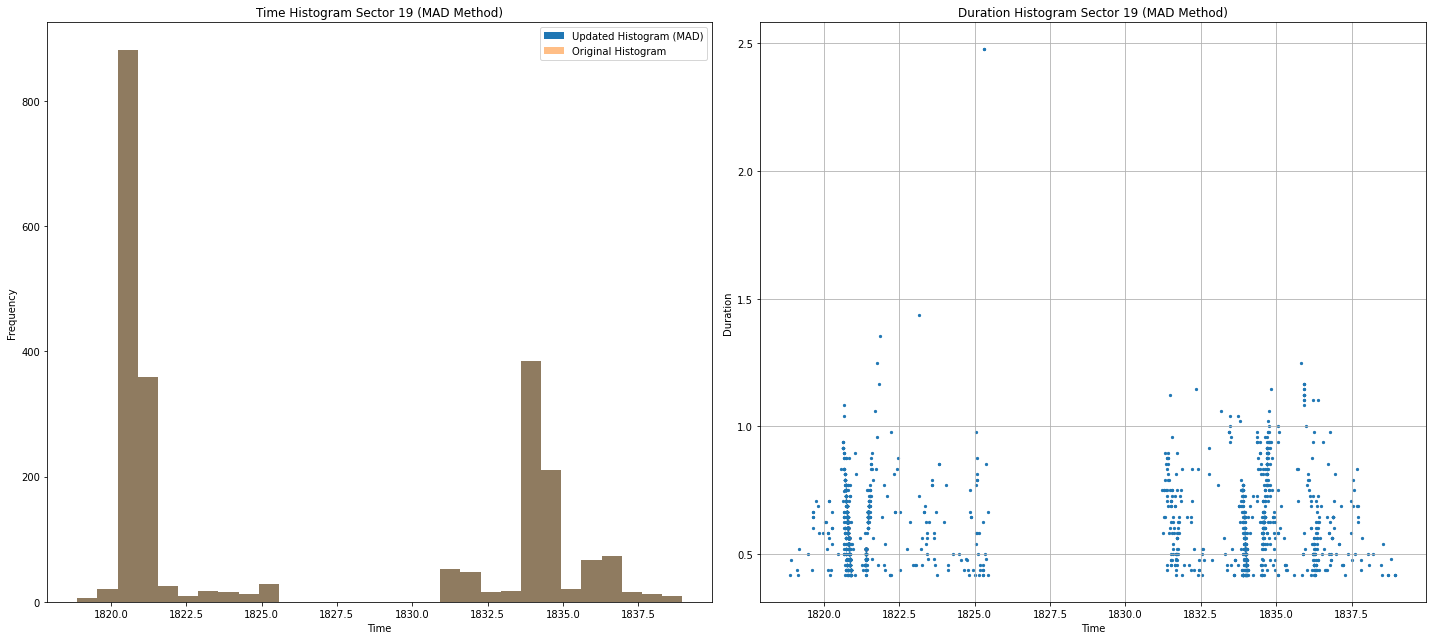

total candidates of Sector 19: 2302


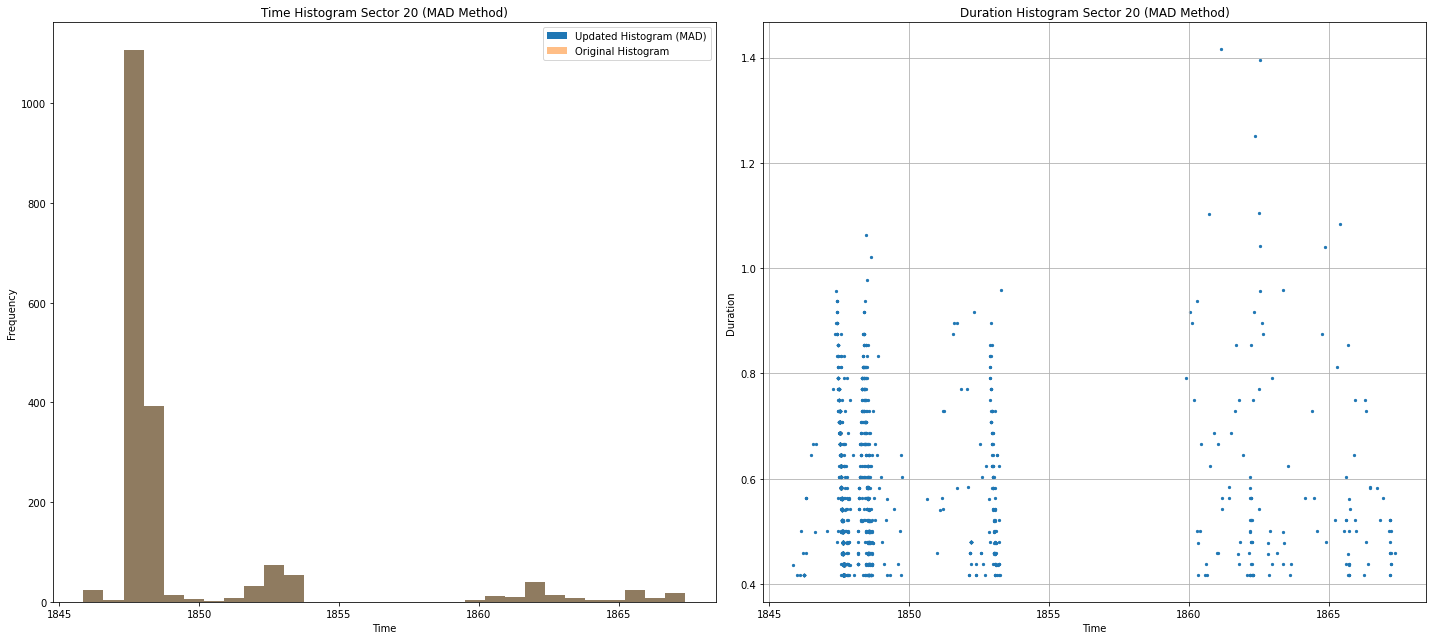

total candidates of Sector 20: 1854


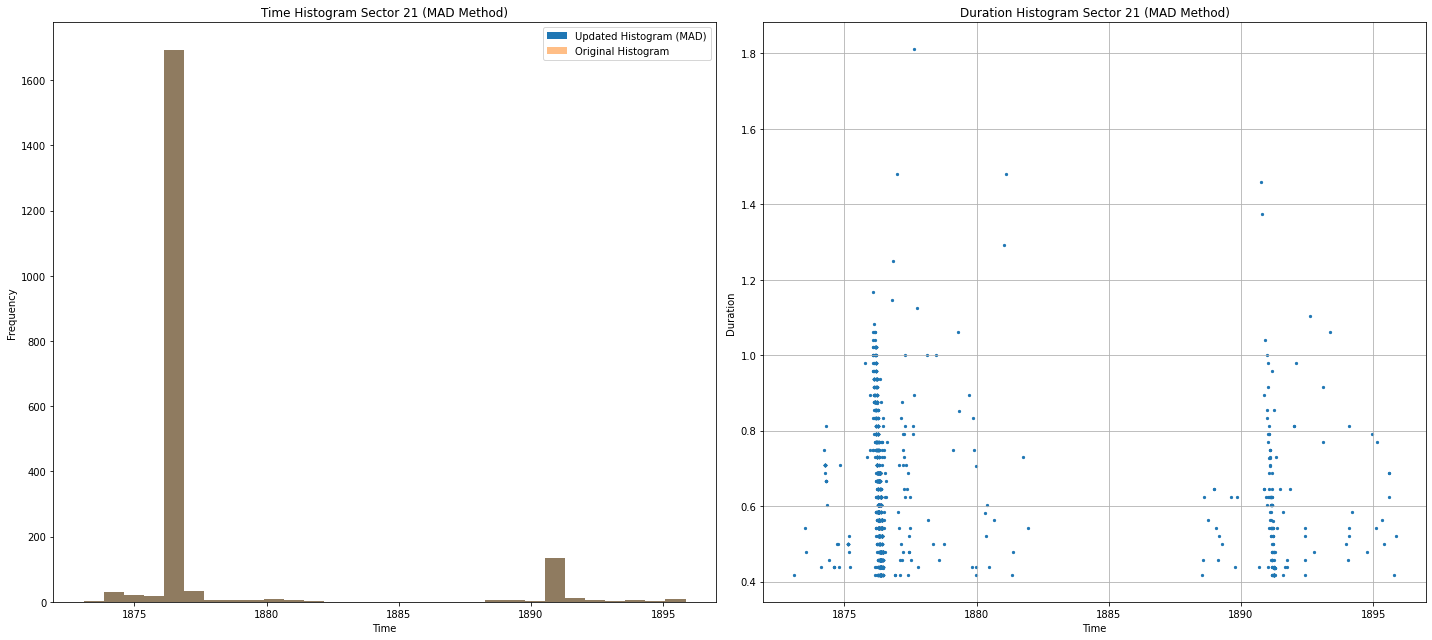

total candidates of Sector 21: 2016


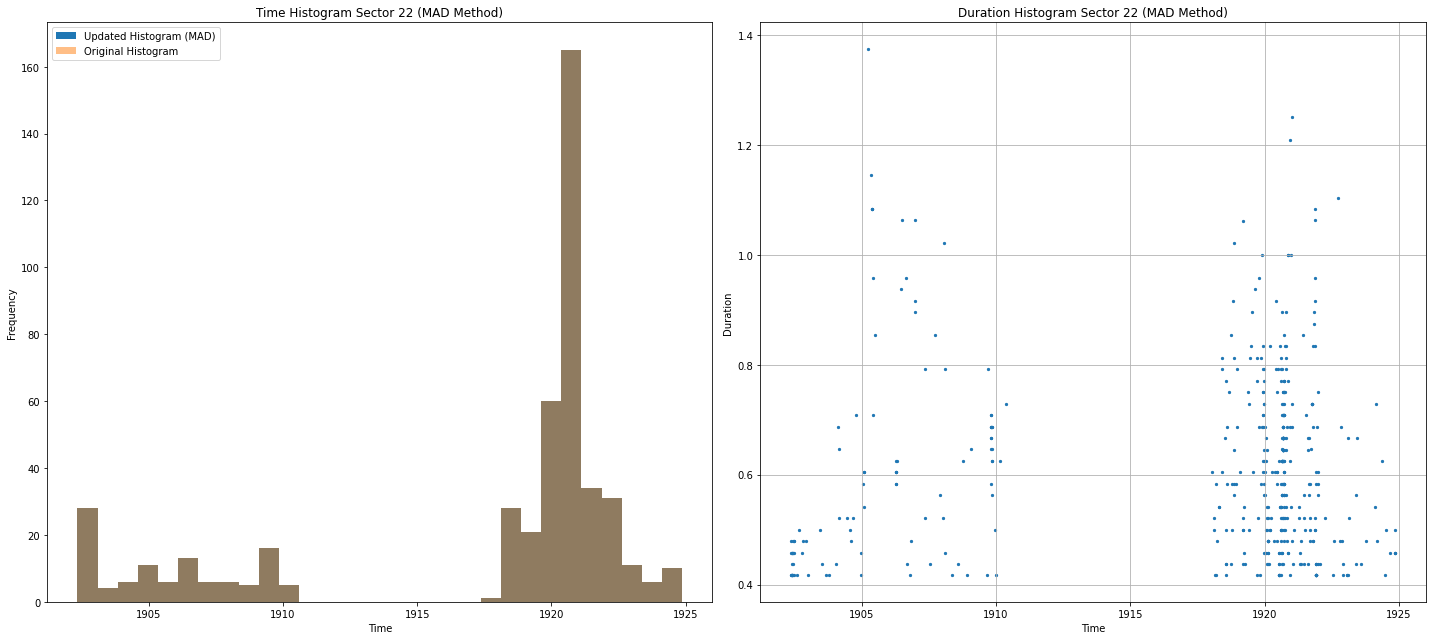

total candidates of Sector 22: 473


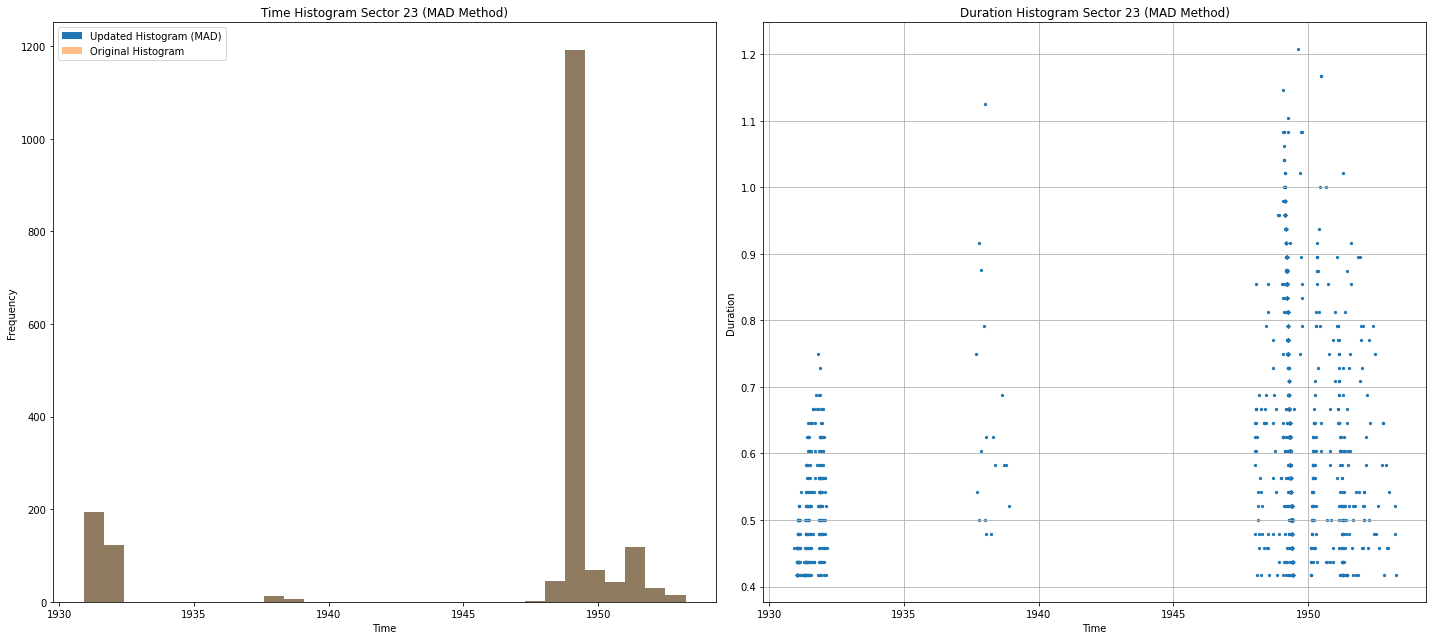

total candidates of Sector 23: 1843


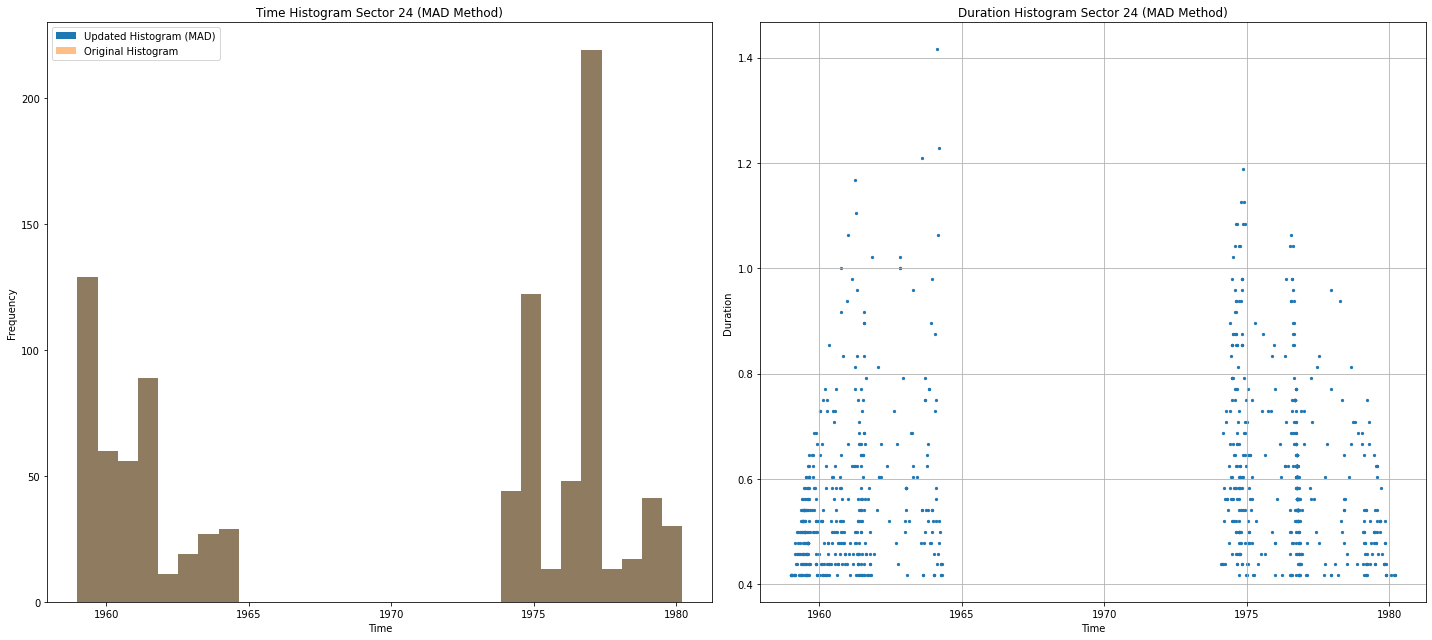

total candidates of Sector 24: 967


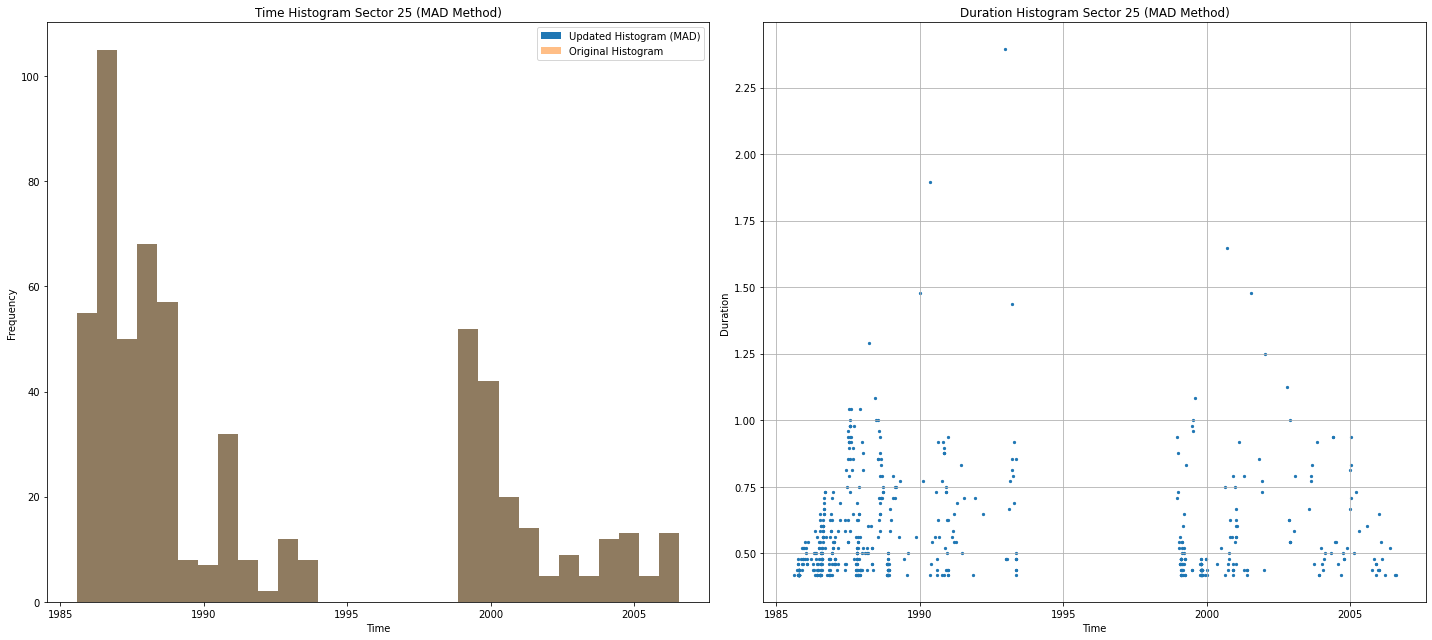

total candidates of Sector 25: 602


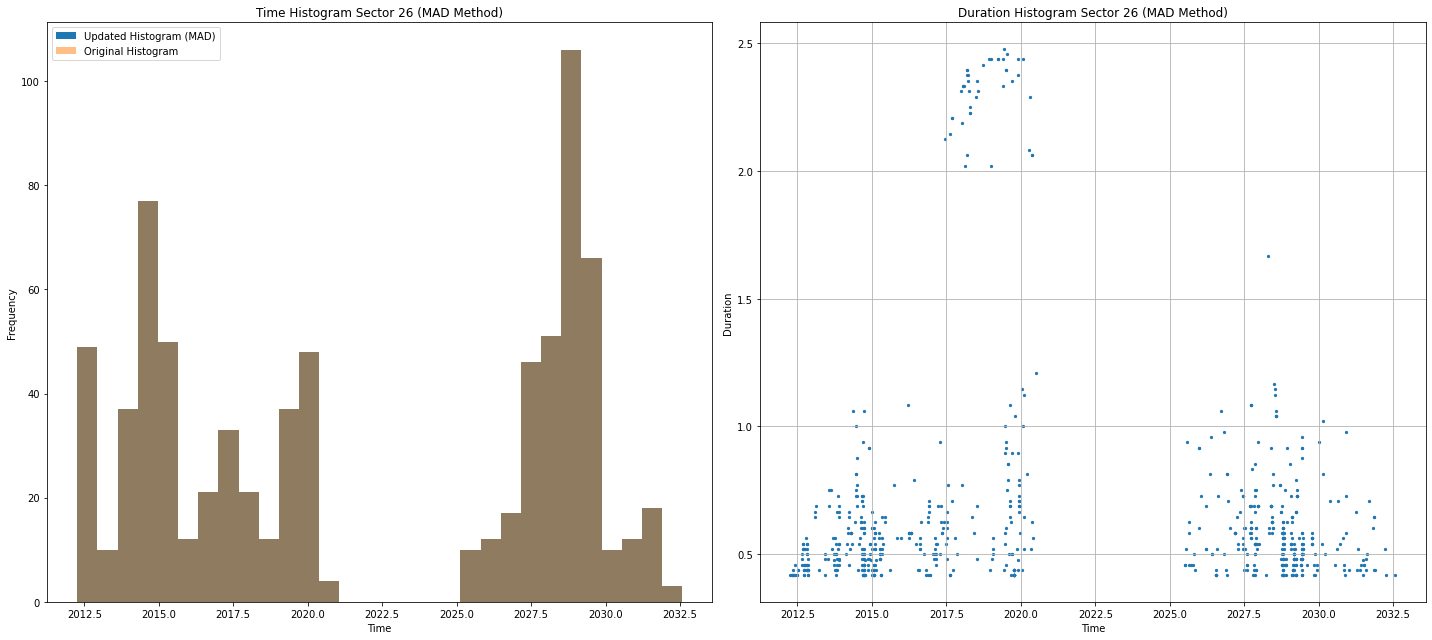

total candidates of Sector 26: 762


In [4]:
max_iterations = 10
initial_sigma = 5

# Assuming 'data_new' is your DataFrame with the 'time' column
# Replace this with your actual DataFrame
data_new = pd.DataFrame({'time': [...]})  # Replace [...] with your 'time' data

for sector in range(1, 27):
    # Construct the dataframe variable name
    dataframe_name = 'sector_' + str(sector)
    
    # Access the dataframe using globals() and the constructed variable name
    data = globals()[dataframe_name]
    data = data[data.transit_prob == 'maybeTransit']
    data = data[(data.asym_score <= 3)].reset_index(drop=True)
    data_new = data[abs(data.snr) >= 5].reset_index(drop=True)
    data_new.drop(data_new[data_new['duration'] <= 0.4].index, inplace=True)
    data_new['abs_depth'] = abs(data_new.depth)
    data_new.drop(data_new[(data_new['abs_depth'] >= 0.1)].index, inplace=True)
    
    # Initialize MAD and sigma
    mad = np.median(np.abs(data_new['time'] - np.median(data_new['time'])))
    sigma = initial_sigma
    
    for iteration in range(max_iterations):
        # Calculate the histogram values and bin edges using np.histogram
        time_histogram, bin_edges = np.histogram(data_new['time'], bins=30)
        
        # Calculate the counts in the anomalous bins
        anomalous_bins = np.abs(time_histogram - np.median(time_histogram)) > sigma * mad
        anomalous_counts = time_histogram[anomalous_bins]
        
        # Remove data points (bins) corresponding to anomalous bins
        #data_new = data_new[~anomalous_bins]
        
        # Update MAD and sigma based on the remaining data
        mad = np.median(np.abs(data_new['time'] - np.median(data_new['time'])))
        sigma = 10  # You can adjust the initial_sigma value here
        
        # Check for convergence (no more anomalous bins)
        if np.sum(anomalous_counts) == 0:
            break
    
    # ... (your existing code)
    
    # Create a subplot
    fig, ax = plt.subplots(1, 2, figsize=(20, 9))
    
    # Plot the updated histogram including all columns (MAD method)
    ax[0].hist(bin_edges[:-1], bins=bin_edges, weights=time_histogram, label='Updated Histogram (MAD)')
    
    # Plot the original 'data_new.time' histogram
    ax[0].hist(data_new['time'], bins=bin_edges, alpha=0.5, label='Original Histogram')
    
    ax[0].set_title('Time Histogram Sector {} (MAD Method)'.format(sector))
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Frequency')
    ax[0].legend()
    
    ax[1].scatter(data_new.time, data_new.duration, s=5)
    ax[1].set_title('Duration Histogram Sector {} (MAD Method)'.format(sector))
    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('Duration')
    
    # Adjust layout to prevent overlapping of titles and labels
    plt.tight_layout()
    plt.grid()
    
    # Show the subplot
    plt.show()
    
    print(f"total candidates of Sector {sector}: {len(data_new)}")

## Robust Z-score method

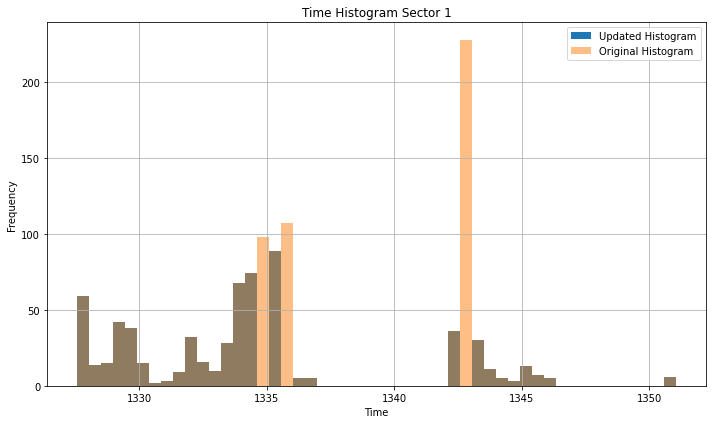

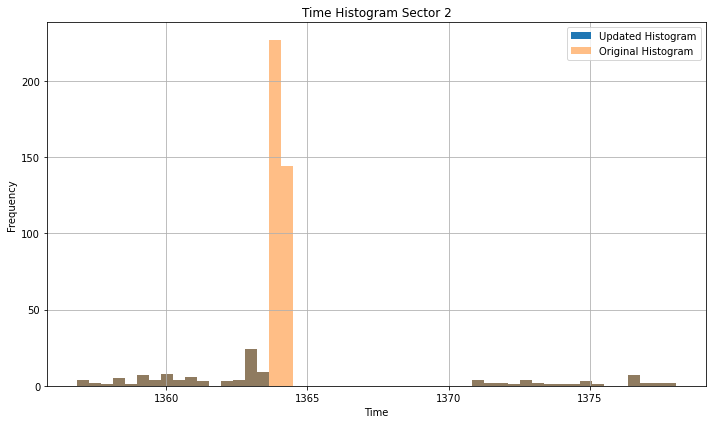

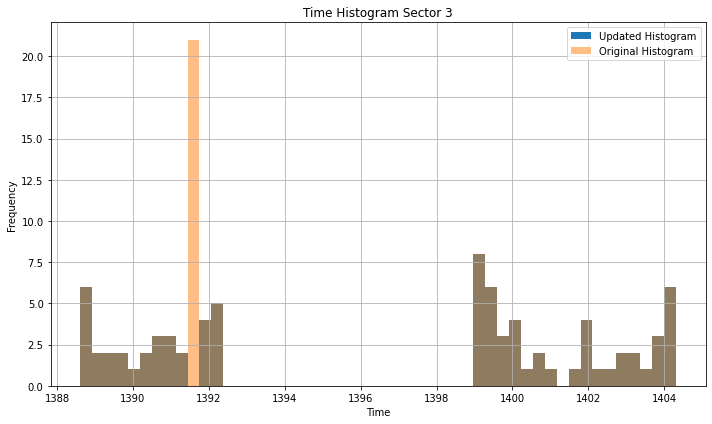

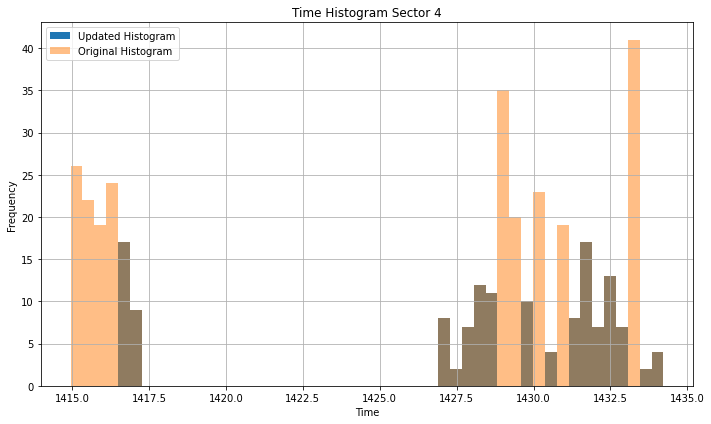

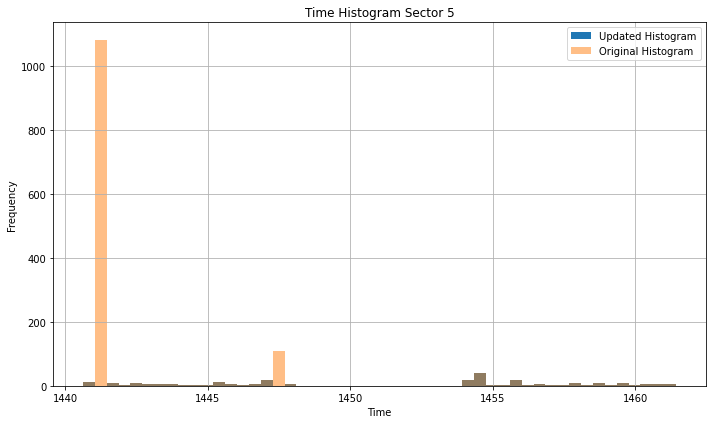

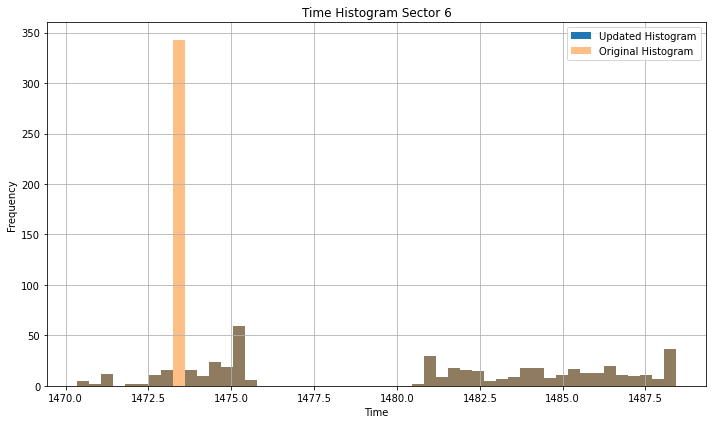

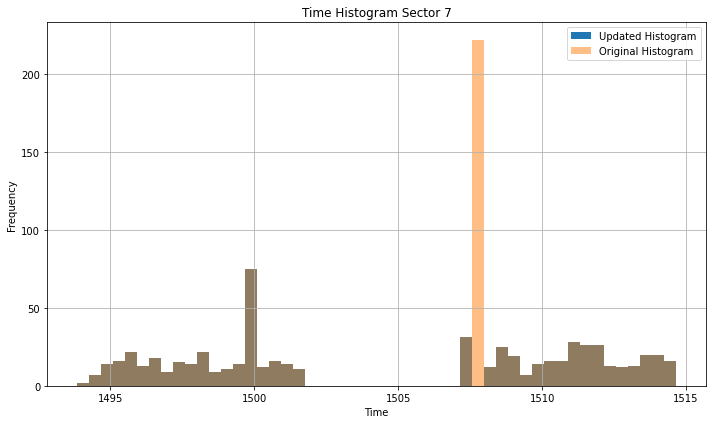

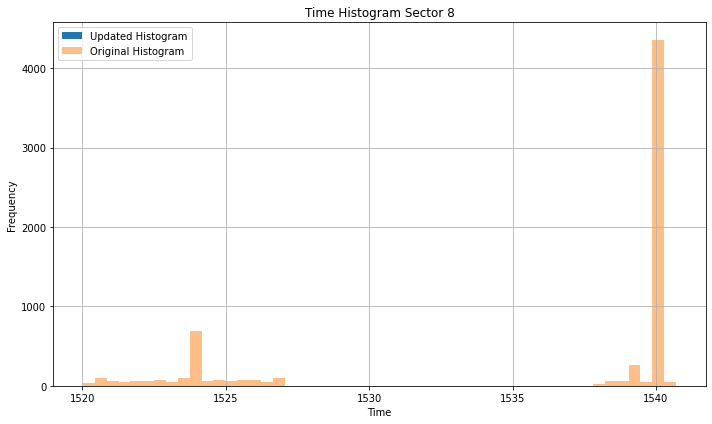

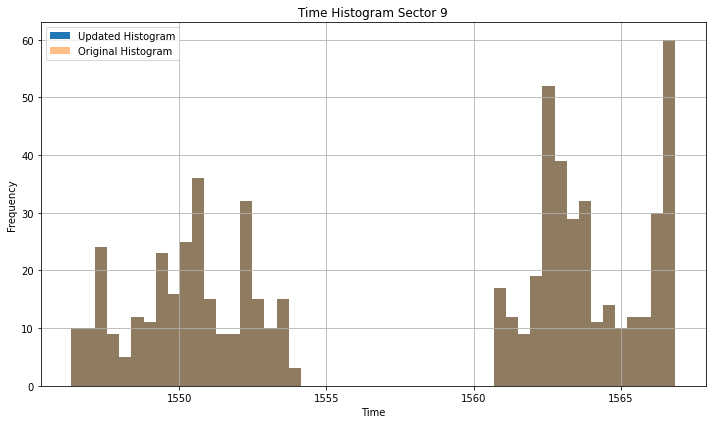

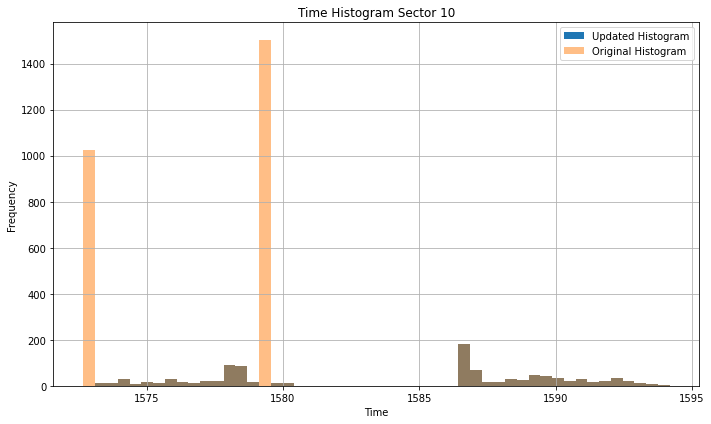

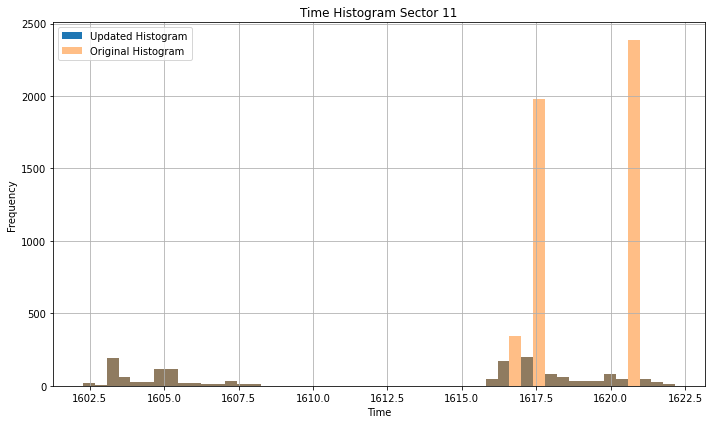

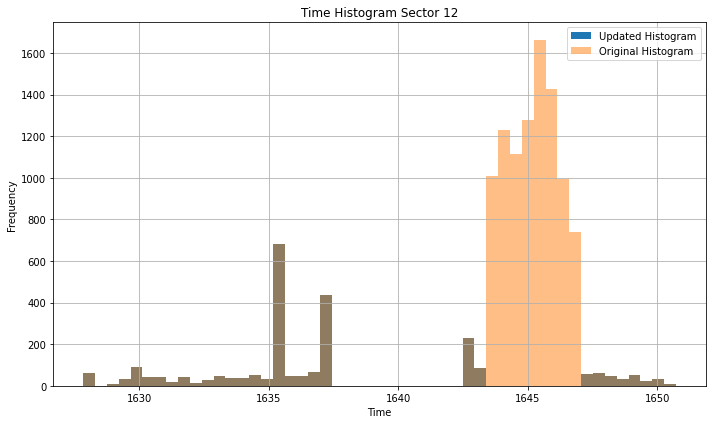

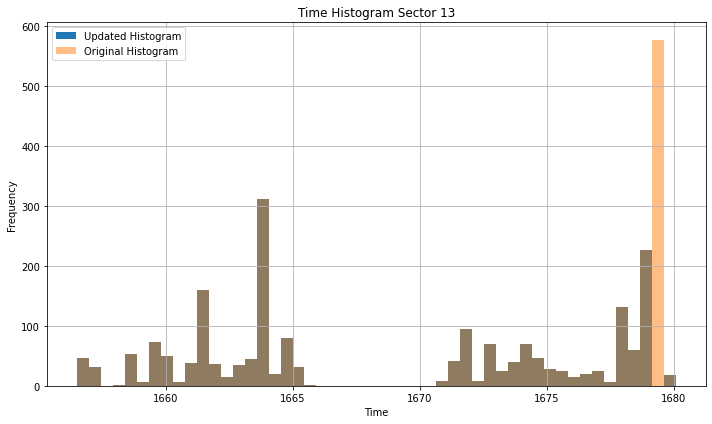

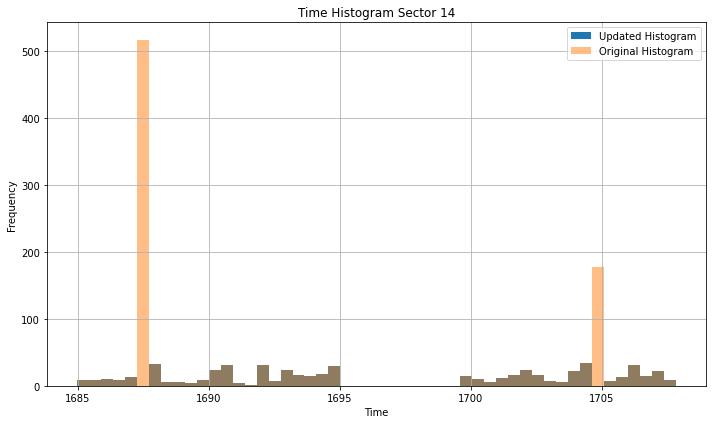

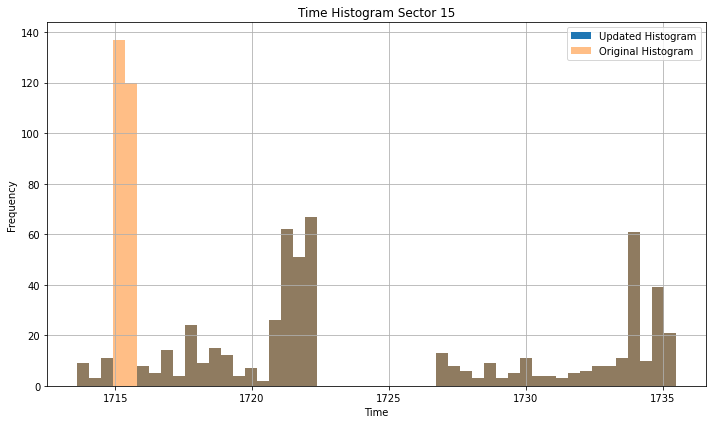

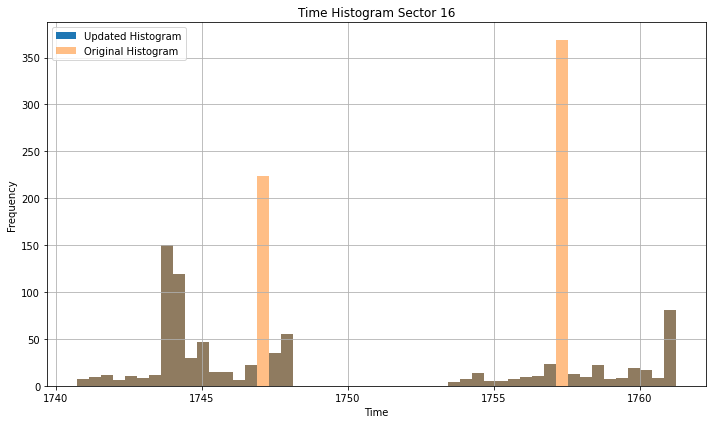

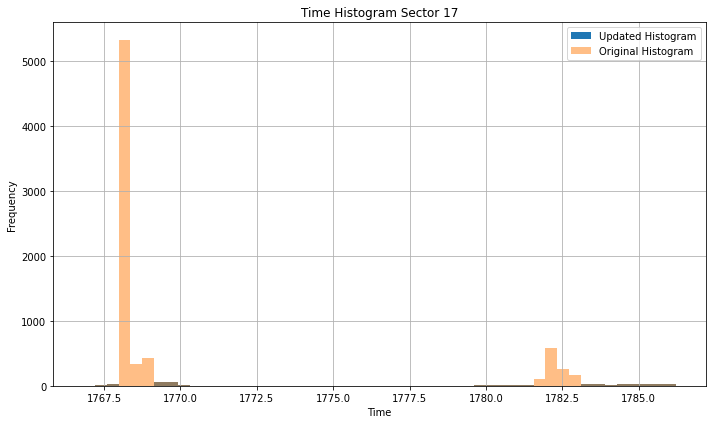

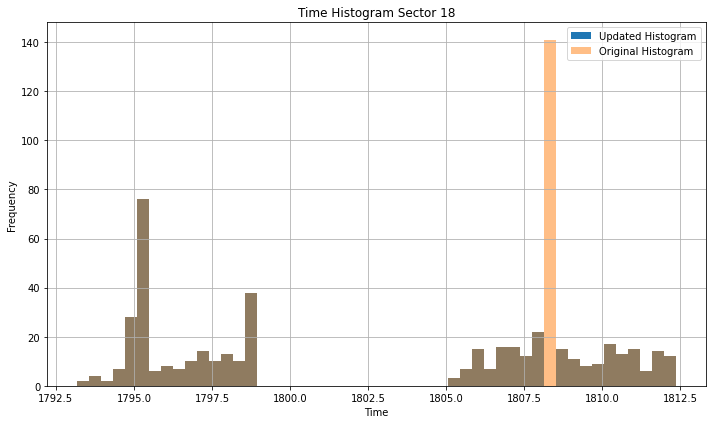

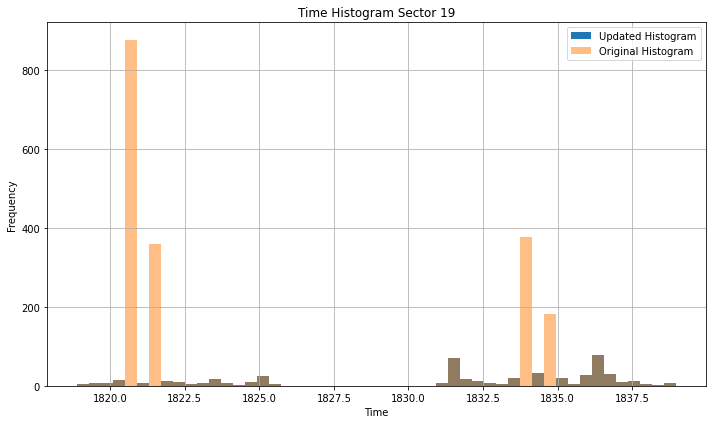

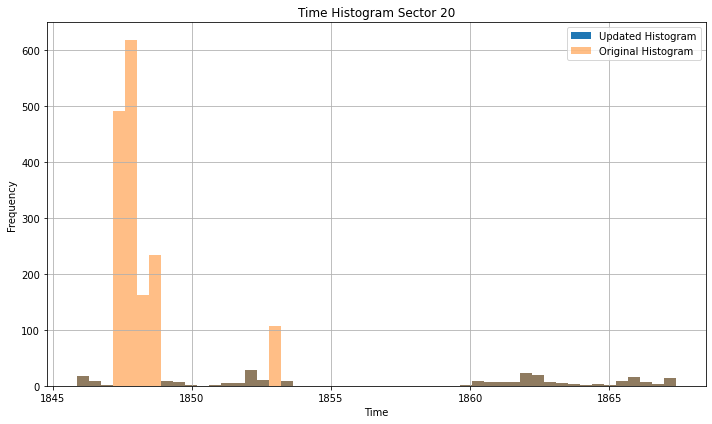

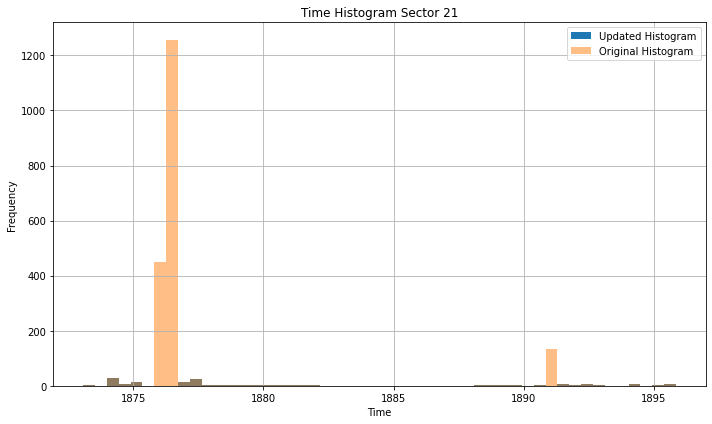

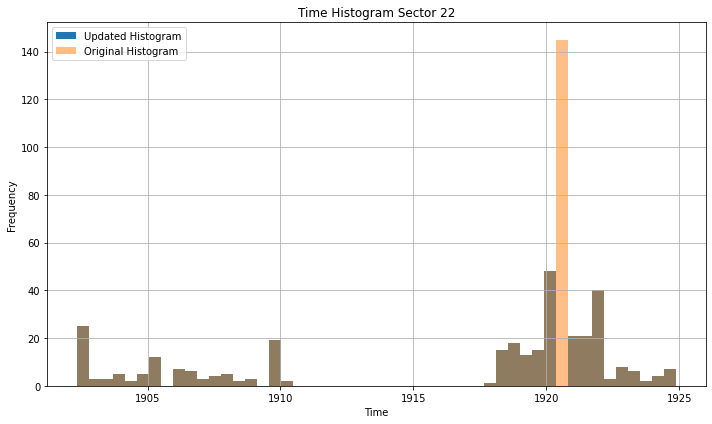

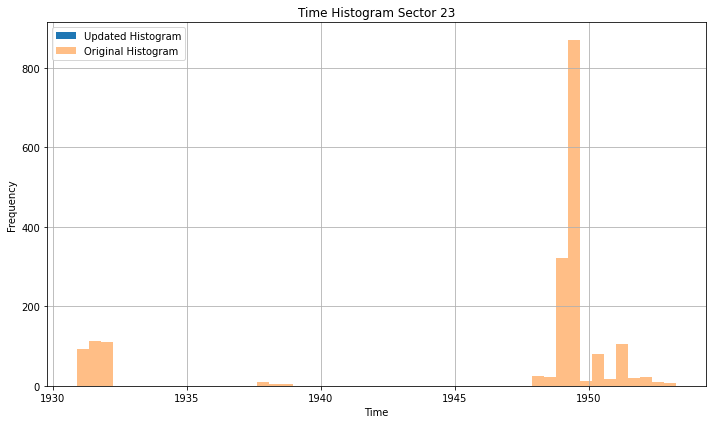

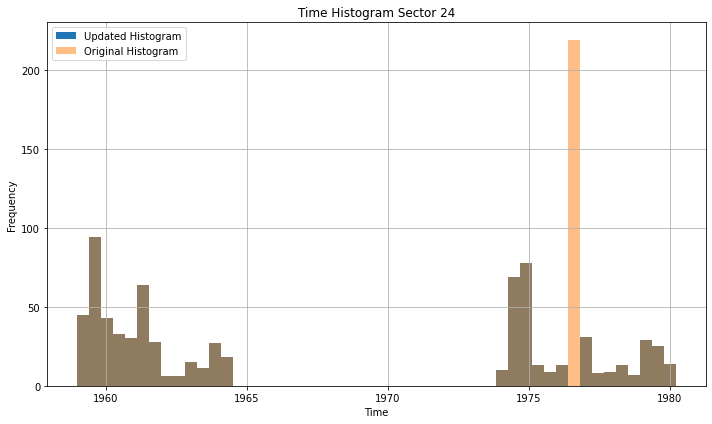

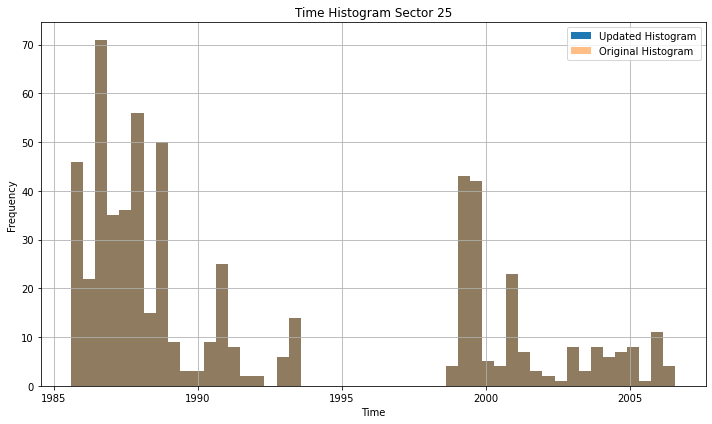

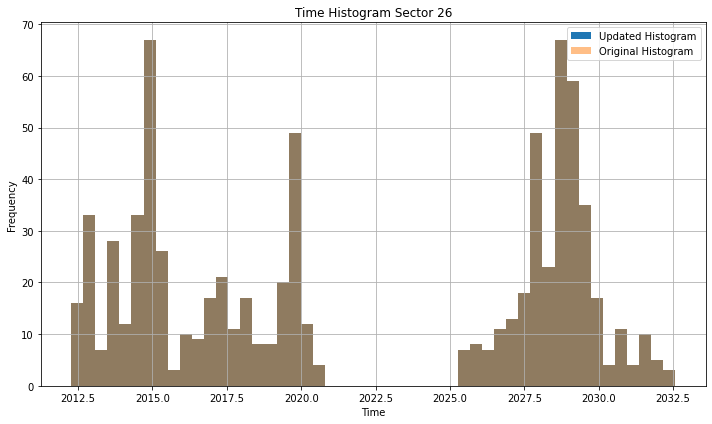

In [9]:
# Assuming 'data_new' is your DataFrame with the 'time' column
# Replace this with your actual DataFrame
data_new = pd.DataFrame({'time': [...]})  # Replace [...] with your 'time' data

for sector in range(1, 27):
    # Construct the dataframe variable name
    dataframe_name = 'sector_' + str(sector)
    
    # Access the dataframe using globals() and the constructed variable name
    data = globals()[dataframe_name]
    data = data[data.transit_prob == 'maybeTransit']
    data = data[(data.asym_score <= 3)].reset_index(drop=True)
    data_new = data[abs(data.snr) >= 5].reset_index(drop=True)
    data_new.drop(data_new[data_new['duration'] <= 0.4].index, inplace=True)
    data_new['abs_depth'] = abs(data_new.depth)
    data_new.drop(data_new[(data_new['abs_depth'] >= 0.1)].index, inplace=True)
    
    # Calculate the histogram values and bin edges using np.histogram
    time_histogram, bin_edges = np.histogram(data_new['time'], bins=50)
    
    median = np.median(time_histogram)
    mad = np.median(np.abs(time_histogram - median))
    
    # Calculate the robust Z-scores for each bin
    robust_z_scores = [(x - median) / (1.4826 * mad) for x in time_histogram]
    
    # Define the threshold for identifying anomalous bins (e.g., 10 robust sigma)
    threshold = 12
    # Identify and remove anomalous bins
    anomalous_bins = [i for i, z in enumerate(robust_z_scores) if z > threshold]
    
    # Update the histogram by setting values of anomalous bins to zero
    for i in anomalous_bins:
        time_histogram[i] = 0  # Set to zero or any other appropriate value
    
    
    # Create a subplot
    fig, ax = plt.subplots(1, figsize=(10, 6))
    
    # Plot the updated histogram without zeros
    ax.hist(bin_edges[:-1], bins=bin_edges, weights=time_histogram, label='Updated Histogram')

    
    # Plot the original 'data_new.time' histogram
    ax.hist(data_new['time'], bins=bin_edges, alpha=0.5, label='Original Histogram')
    
    ax.set_title('Time Histogram Sector {}'.format(sector))
    ax.set_xlabel('Time')
    ax.set_ylabel('Frequency')
    ax.legend()
    
    # Adjust layout to prevent overlapping of titles and labels
    plt.tight_layout()
    plt.grid()
    plt.show()

    # Show the subplot

In [17]:
sector_5['path'] = sector_5['path'].str.replace('/tmp/tess/', '/storage/astro2/phrdhx/tesslcs/')

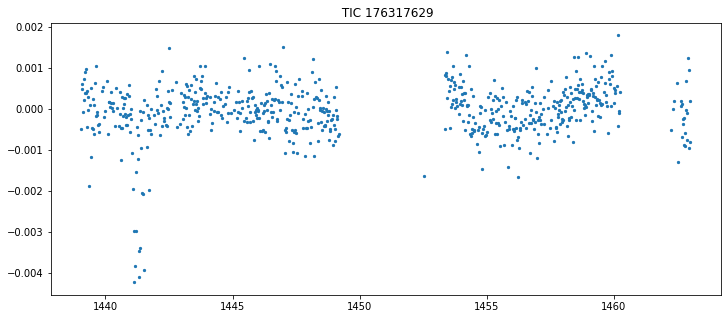

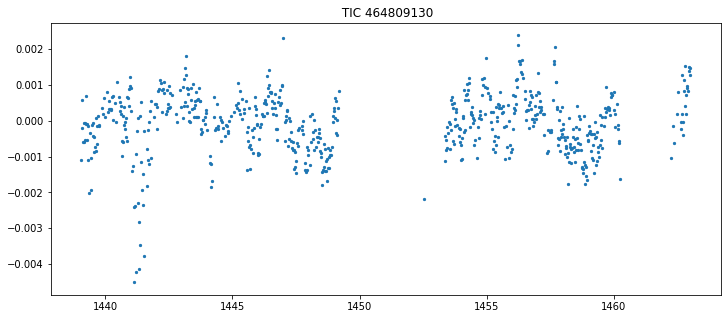

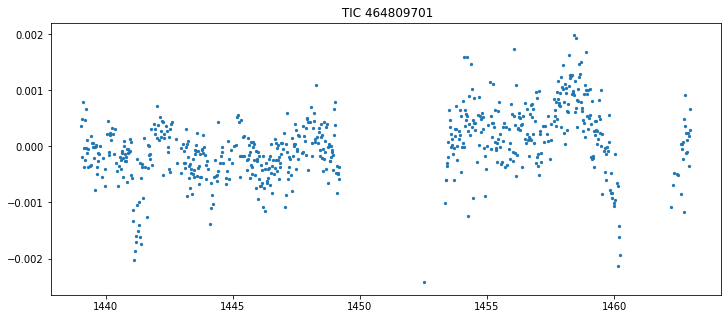

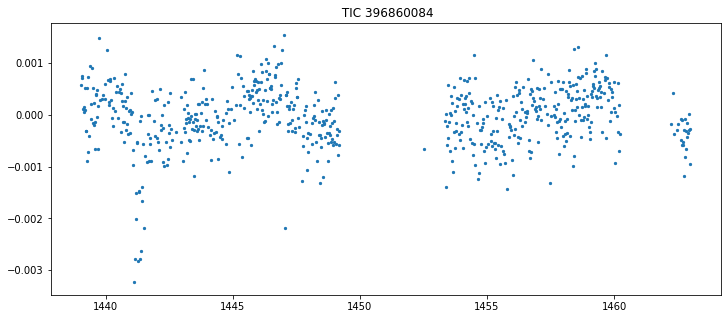

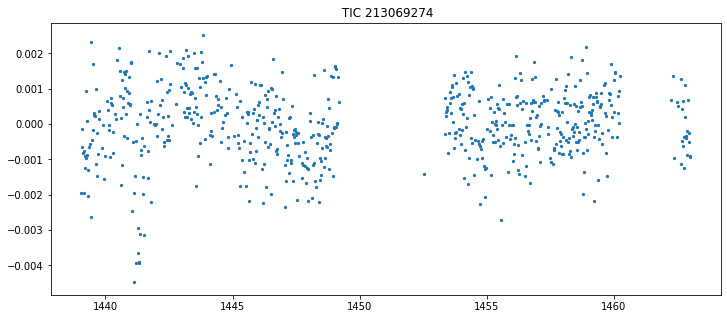

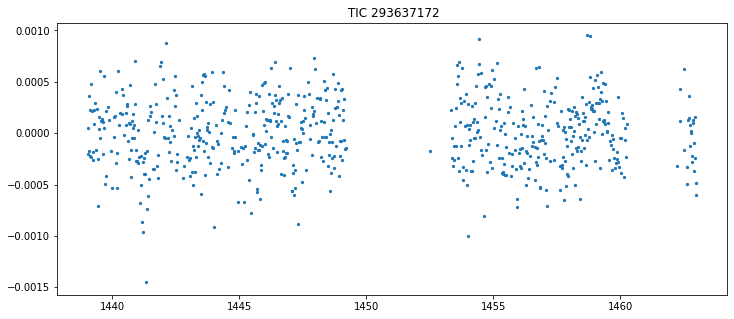

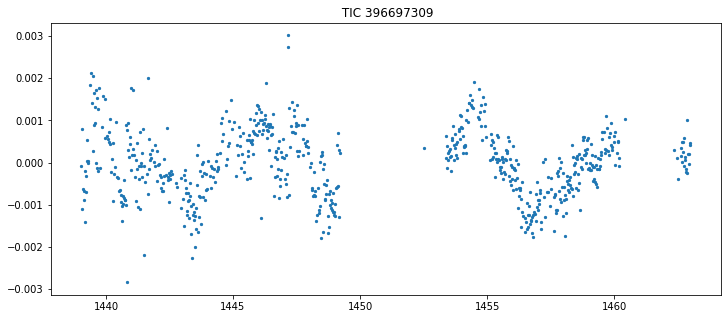

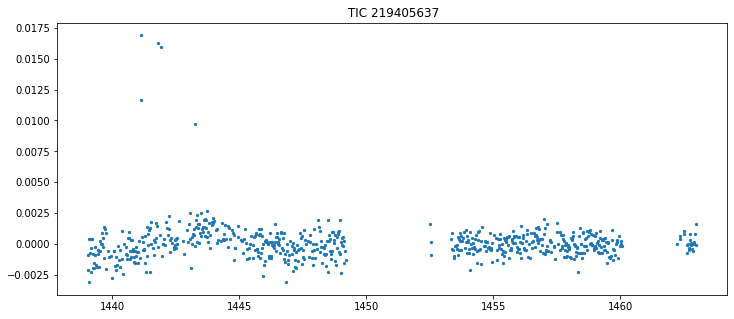

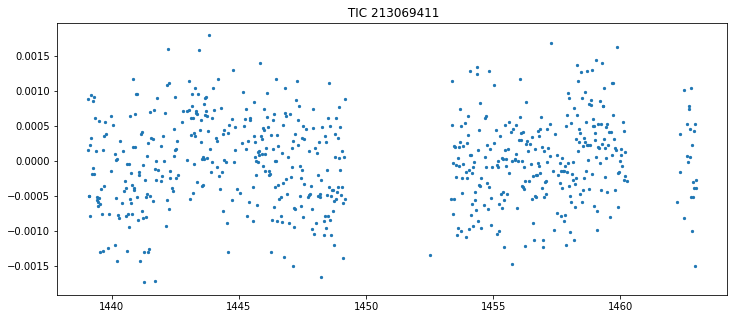

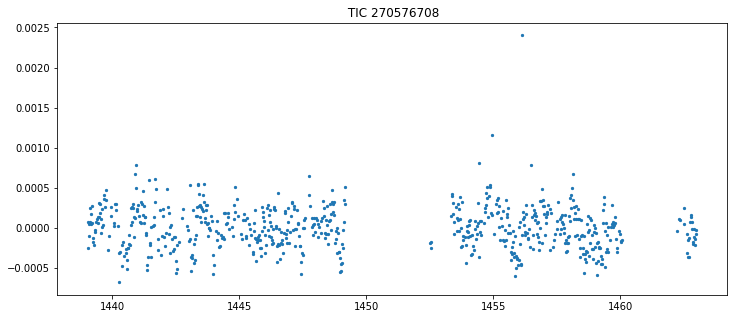

In [19]:
for i in sector_5[(sector_5.time >= 1440) & (sector_5.time <= 1442) & (sector_5.duration >= 0.4) & (sector_5.duration <= 0.5)].path.head(10): #4 x 4 grid for illustration purposes
    lc, lc_info = import_XRPlightcurve(i,sector=1)
    plt.figure(figsize=(12,5))
    plt.scatter(lc['time'],normalise_flux(lc['corrected flux']), s=5)
    plt.title(f' TIC {lc_info[0]}')
    plt.show()